In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [171]:
laps_df = pd.read_pickle('cleaned_laps.pkl')

In [172]:
laps_df.dtypes

Driver                     object
LapTime                   float64
LapNumber                 float64
Stint                     float64
SpeedAfterSector1         float64
SpeedAfterSector2         float64
SpeedAtFinishLine         float64
SpeedAtLongestStraight    float64
IsPersonalBest               bool
Compound                   object
LapsOnTyre                float64
FreshTyre                    bool
Team                       object
Position                  float64
AirTemp                   float64
Humidity                  float64
Pressure                  float64
Rainfall                     bool
TrackTemp                 float64
WindSpeed                 float64
Speed_mean                float64
Speed_median              float64
Speed_min                 float64
Speed_max                 float64
Speed_std                 float64
RPM_mean                  float64
RPM_median                float64
RPM_min                   float64
RPM_max                   float64
RPM_std       

In [173]:
categorical_columns = laps_df.select_dtypes(include=['object', 'bool']).columns
numerical_columns = laps_df.columns.difference(categorical_columns)
print(f'numerical columns:\n{numerical_columns}')
print(f'categorical columns:\n{categorical_columns}')

numerical columns:
Index(['AirTemp', 'Brake_mean', 'Brake_median', 'Humidity', 'LapNumber',
       'LapTime', 'LapsOnTyre', 'Position', 'Pressure', 'RPM_max', 'RPM_mean',
       'RPM_median', 'RPM_min', 'RPM_std', 'SpeedAfterSector1',
       'SpeedAfterSector2', 'SpeedAtFinishLine', 'SpeedAtLongestStraight',
       'Speed_max', 'Speed_mean', 'Speed_median', 'Speed_min', 'Speed_std',
       'Stint', 'Throttle_max', 'Throttle_mean', 'Throttle_median',
       'Throttle_min', 'Throttle_std', 'TrackTemp', 'WindSpeed', 'nGear_max',
       'nGear_mean', 'nGear_median', 'nGear_min', 'nGear_std'],
      dtype='object')
categorical columns:
Index(['Driver', 'IsPersonalBest', 'Compound', 'FreshTyre', 'Team', 'Rainfall',
       'ContainsTrackStatus1', 'ContainsTrackStatus2', 'ContainsTrackStatus3',
       'ContainsTrackStatus4', 'ContainsTrackStatus5', 'ContainsTrackStatus6',
       'ContainsTrackStatus7', 'DirectionOfWind'],
      dtype='object')


In [174]:
def univariate_analysis(df, columns):
    for column in columns:
        print(f'\nColumn: {column}')
        print('Skew:', round(df[column].skew(), 2))
        
        plt.figure(figsize=(15, 4))
        
        # Histogram
        plt.subplot(1, 2, 1)
        df[column].hist(grid=False)
        plt.title(f'{column} - Histogram')
        plt.ylabel('Count')
        
        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[column])
        plt.title(f'{column} - Boxplot')
        
        plt.tight_layout()
        plt.show()


Column: AirTemp
Skew: -0.21


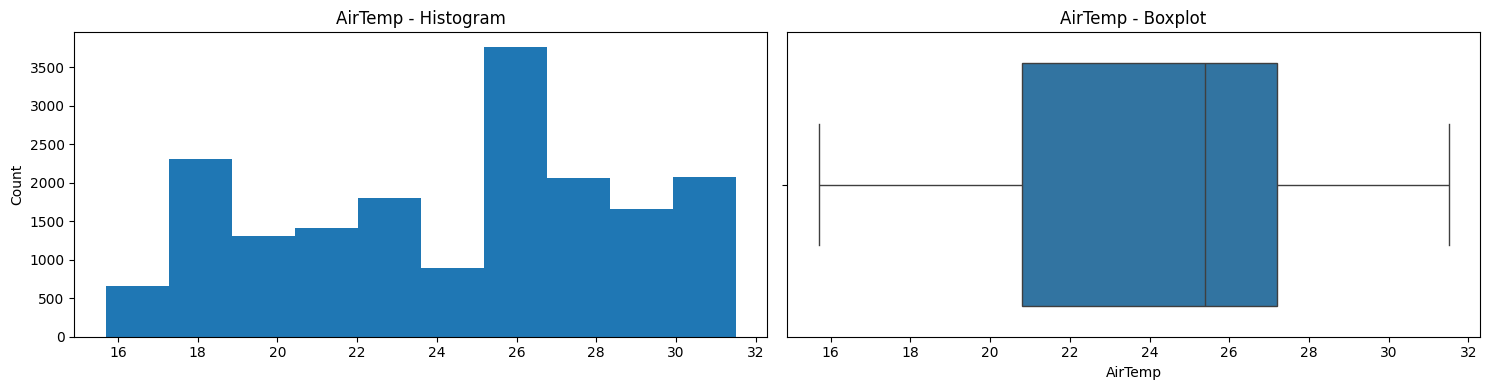


Column: Brake_mean
Skew: 0.87


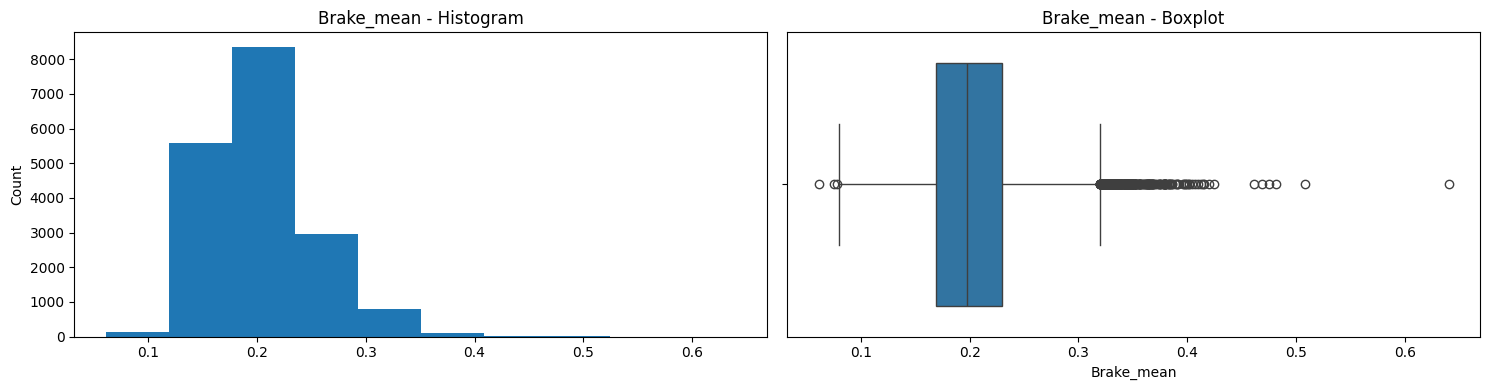


Column: Brake_median
Skew: 94.67


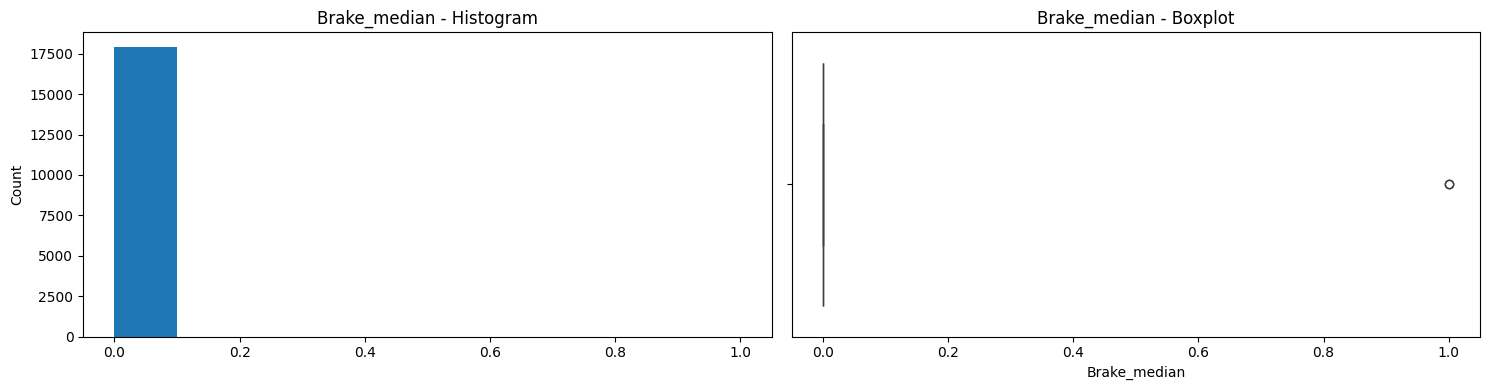


Column: Humidity
Skew: -0.5


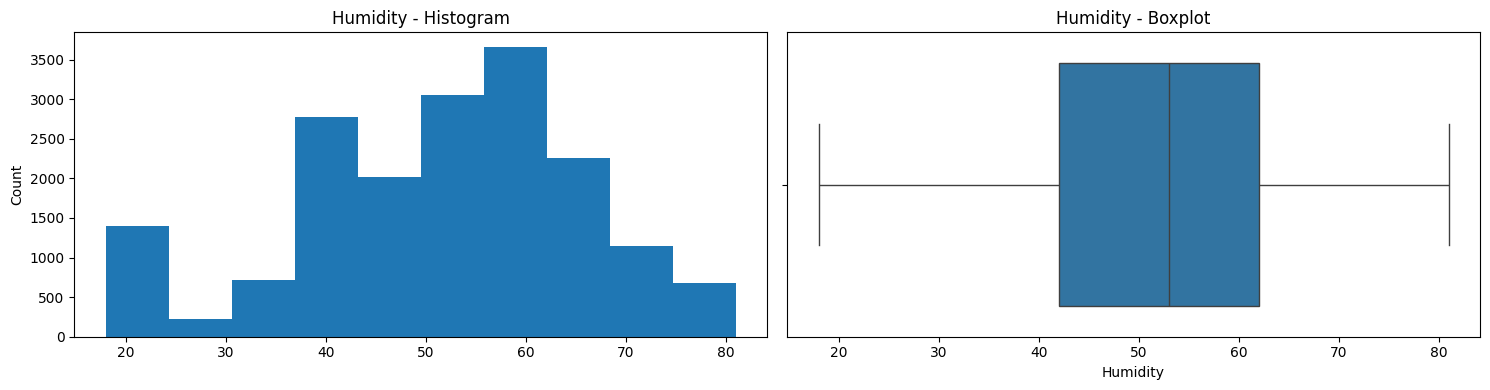


Column: LapNumber
Skew: 0.27


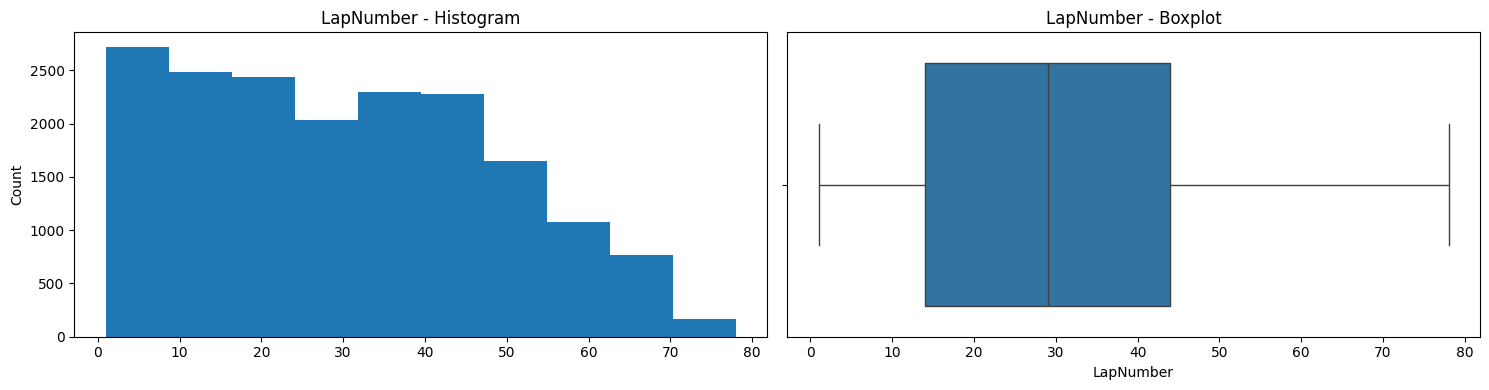


Column: LapTime
Skew: 0.96


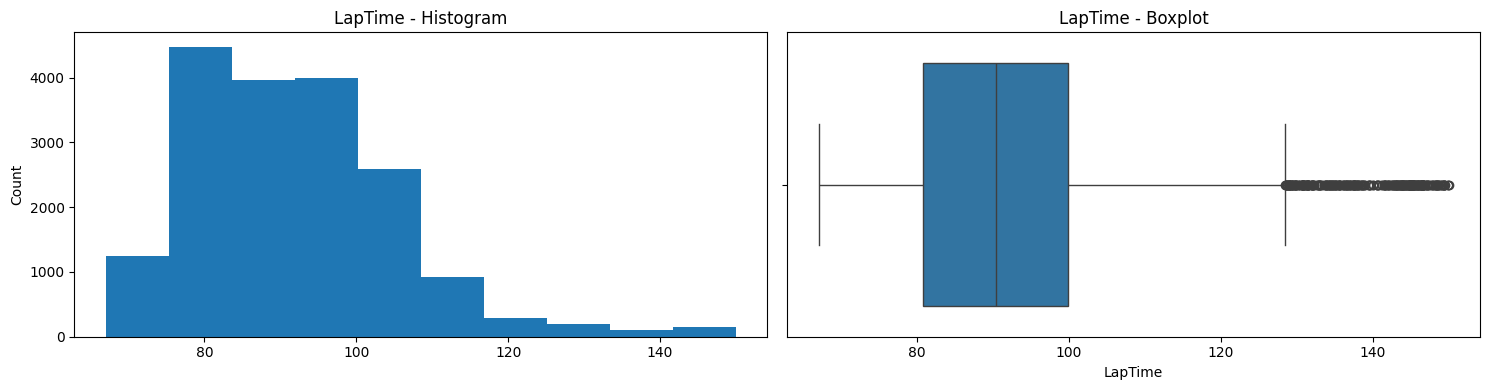


Column: LapsOnTyre
Skew: 1.09


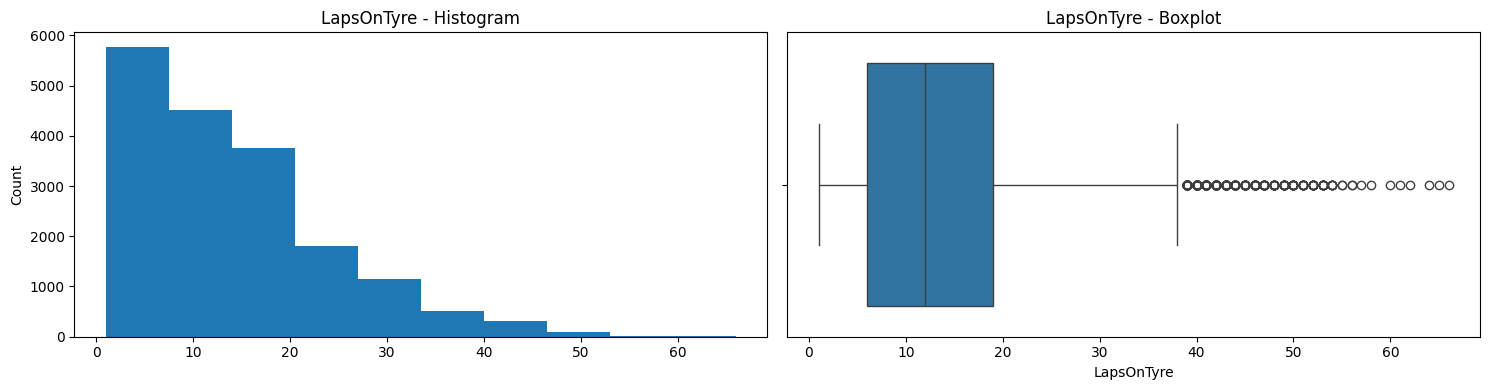


Column: Position
Skew: 0.04


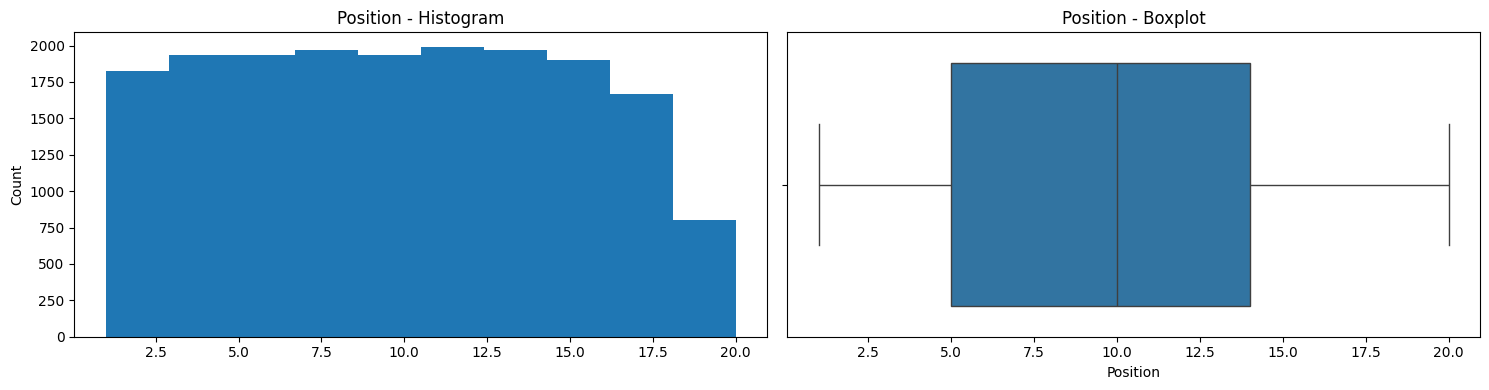


Column: Pressure
Skew: -2.66


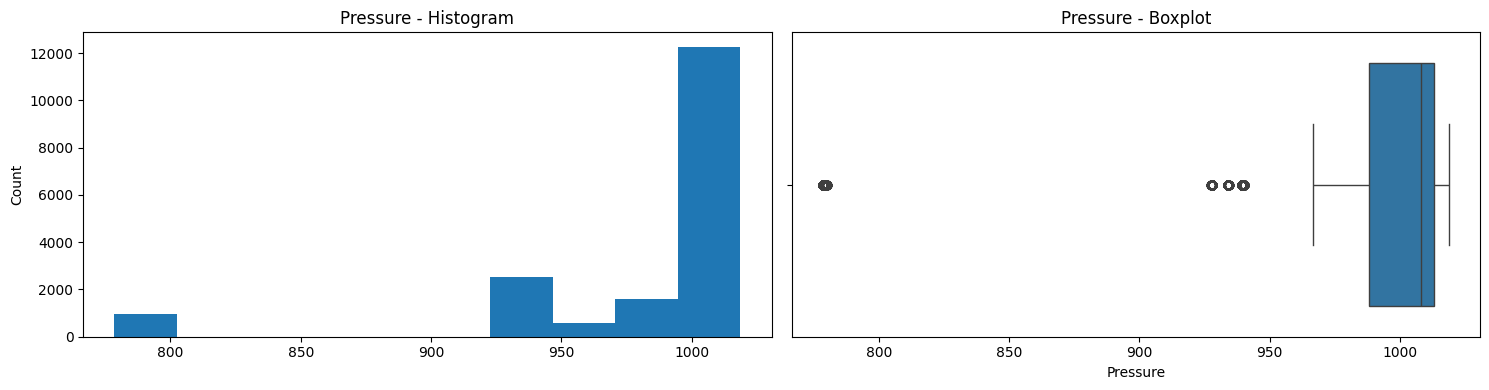


Column: RPM_max
Skew: 0.88


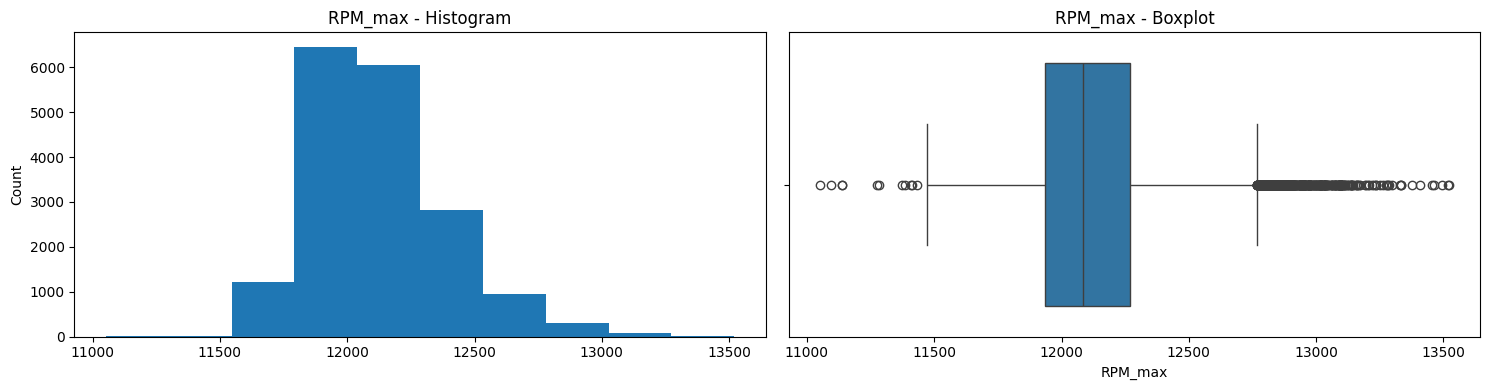


Column: RPM_mean
Skew: -1.37


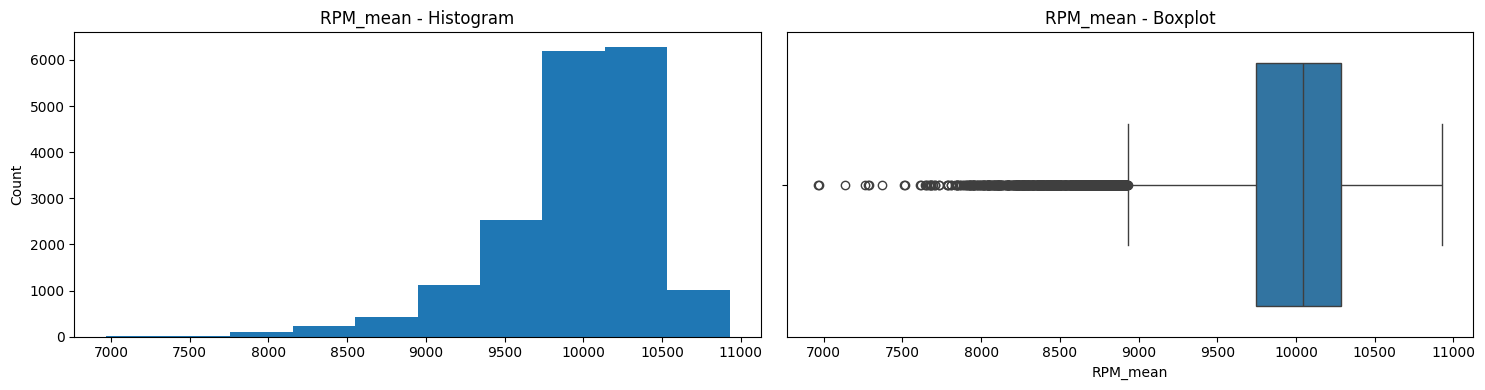


Column: RPM_median
Skew: -2.2


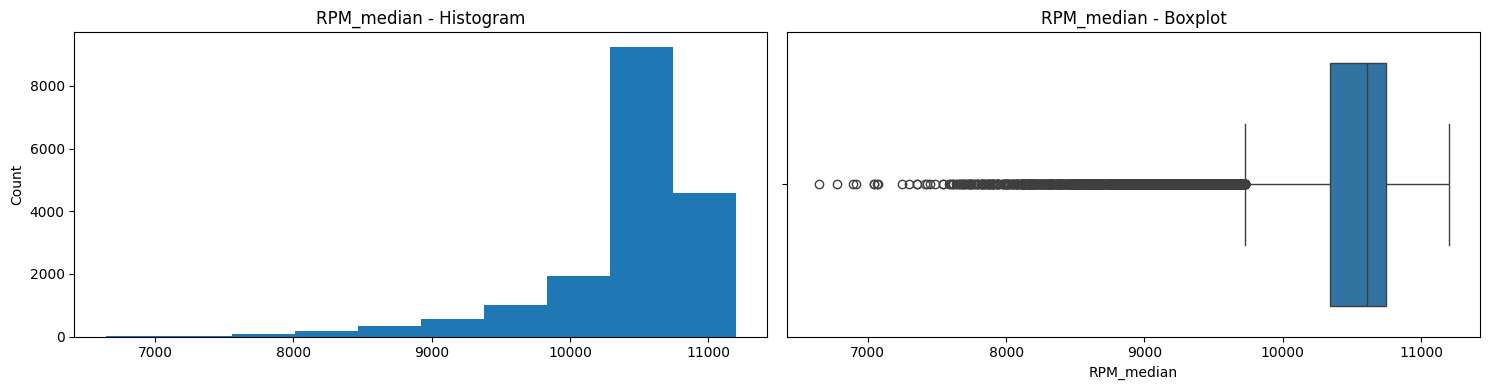


Column: RPM_min
Skew: -0.2


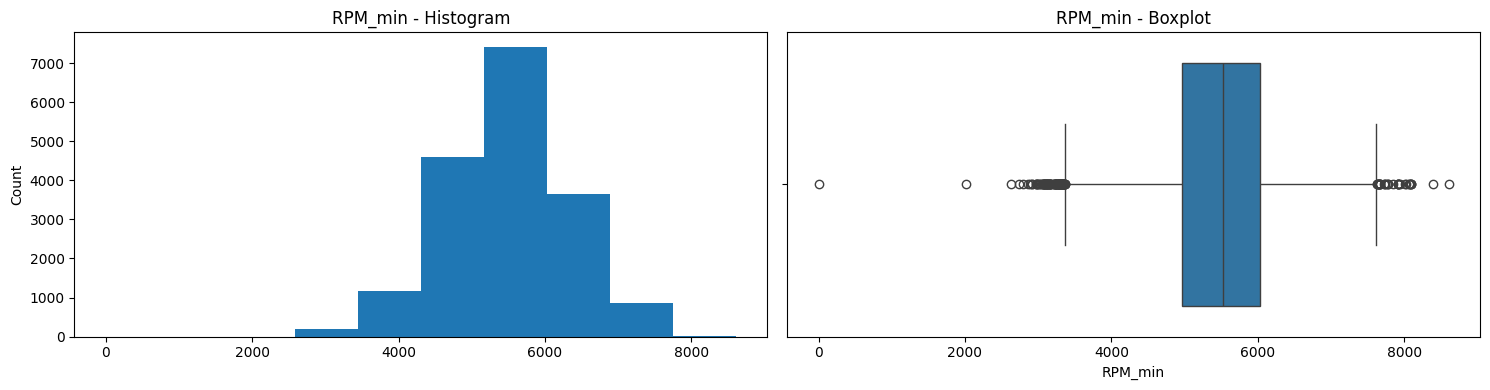


Column: RPM_std
Skew: 0.35


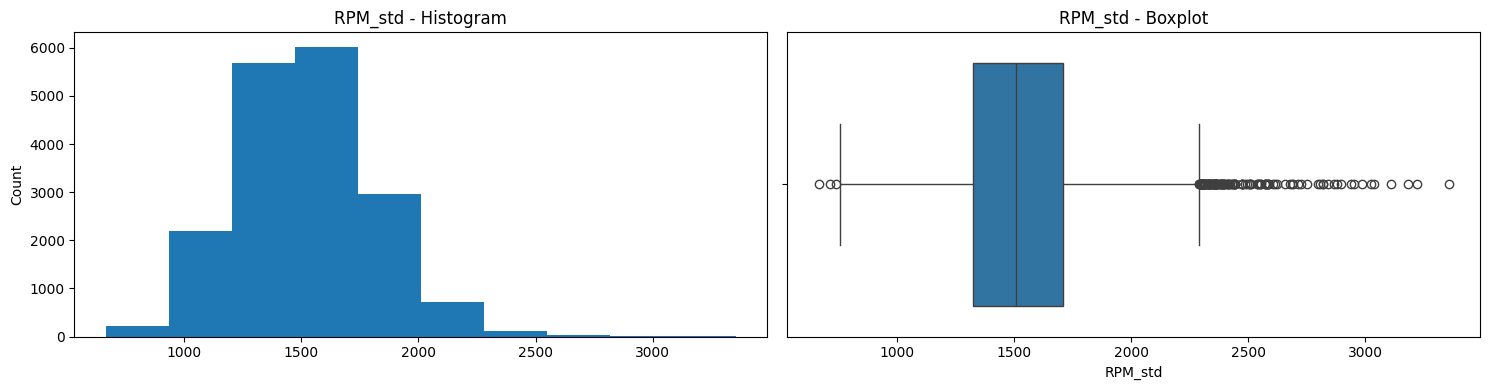


Column: SpeedAfterSector1
Skew: -0.7


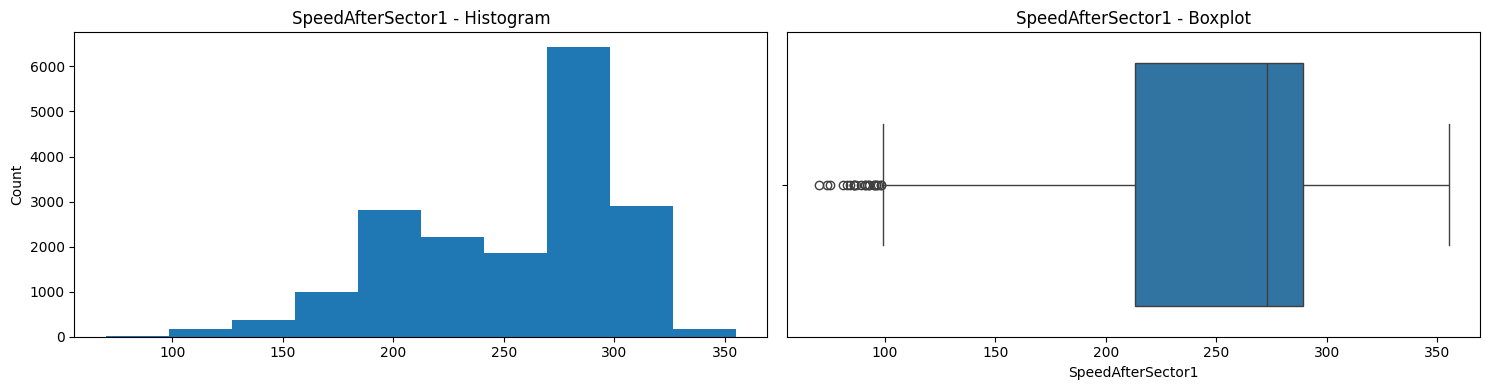


Column: SpeedAfterSector2
Skew: -0.41


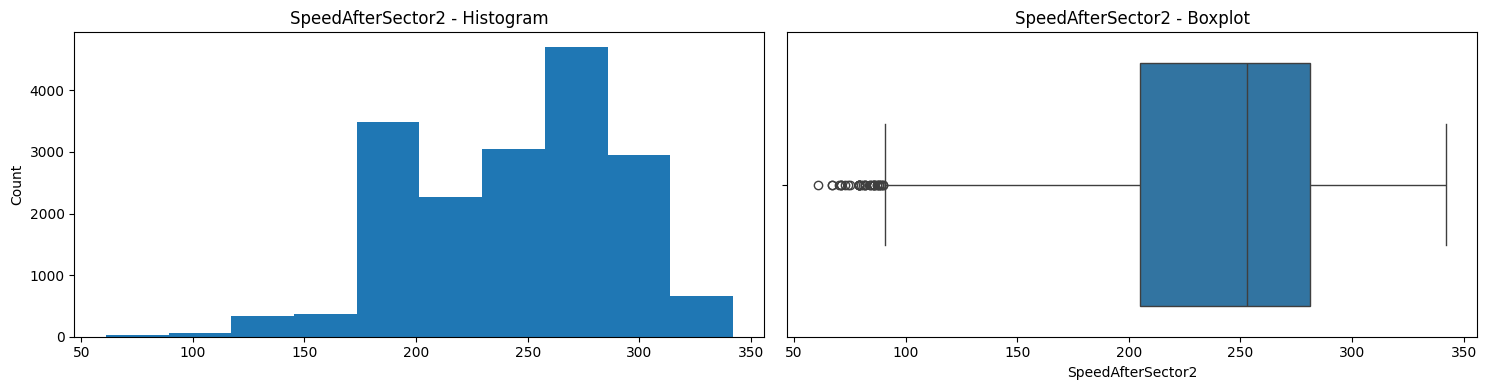


Column: SpeedAtFinishLine
Skew: -0.73


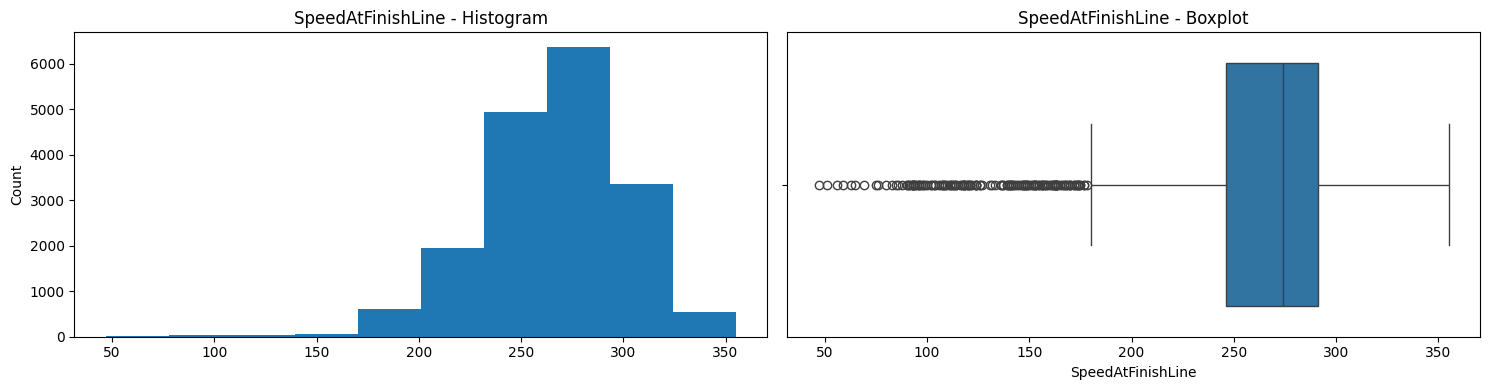


Column: SpeedAtLongestStraight
Skew: -2.83


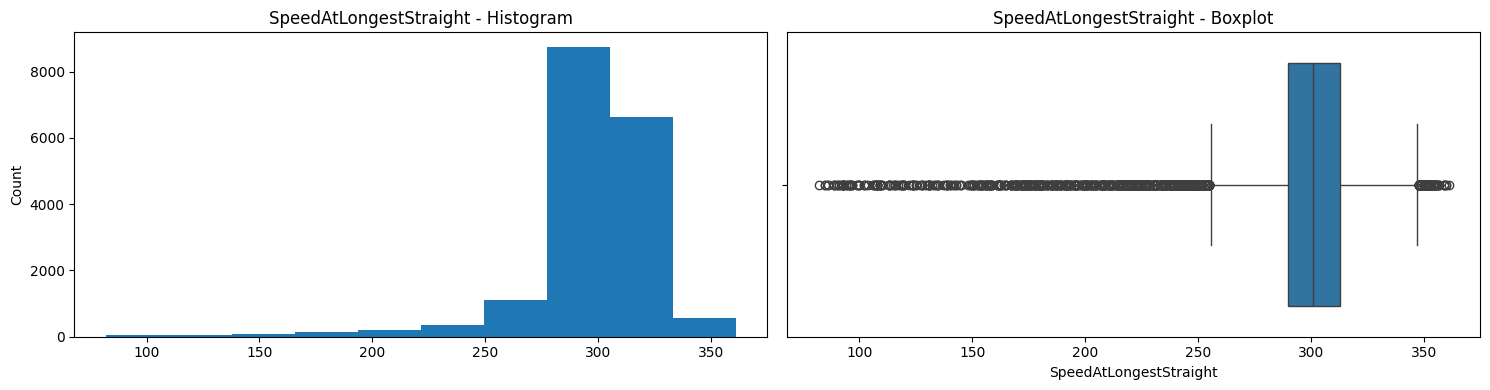


Column: Speed_max
Skew: -0.33


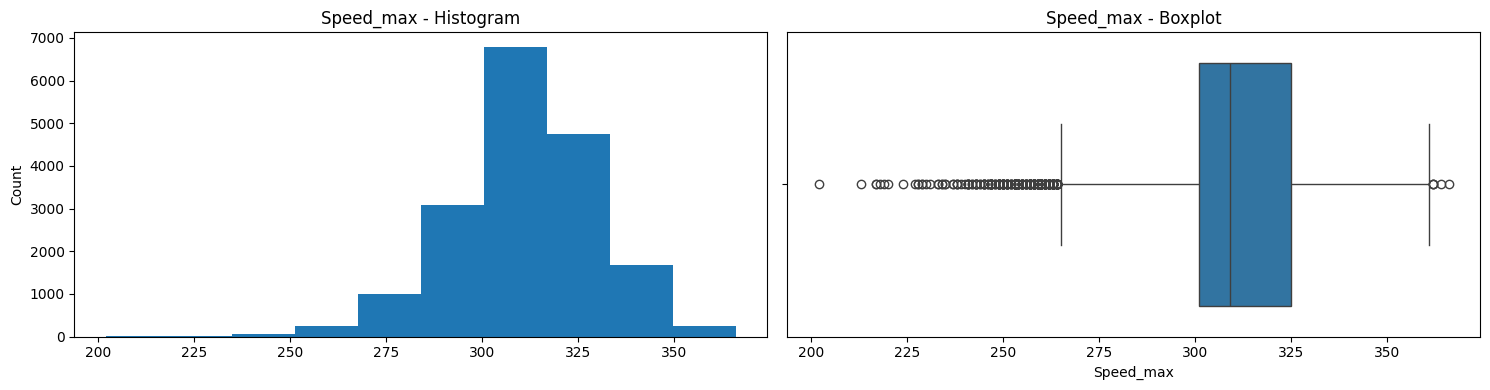


Column: Speed_mean
Skew: -0.97


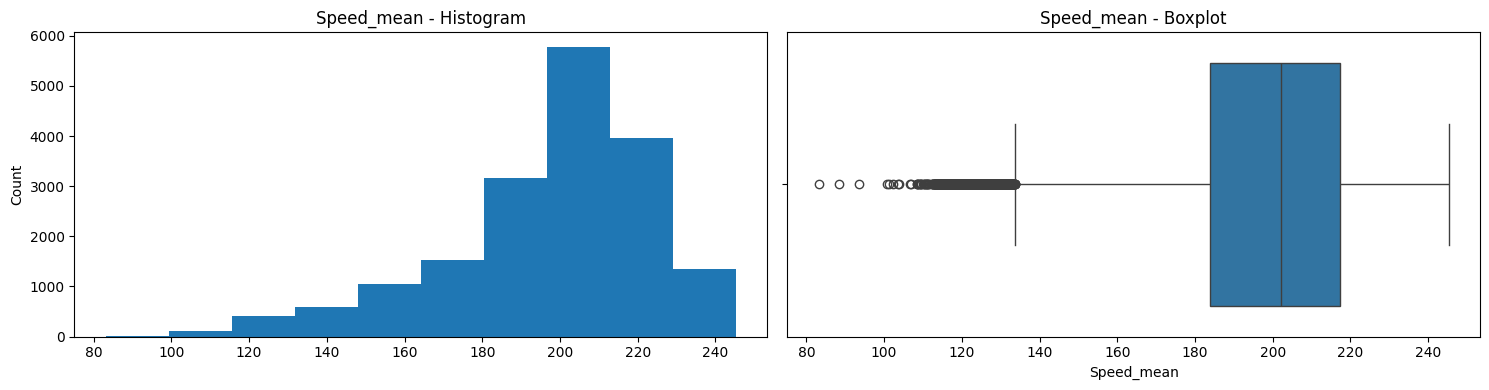


Column: Speed_median
Skew: -0.77


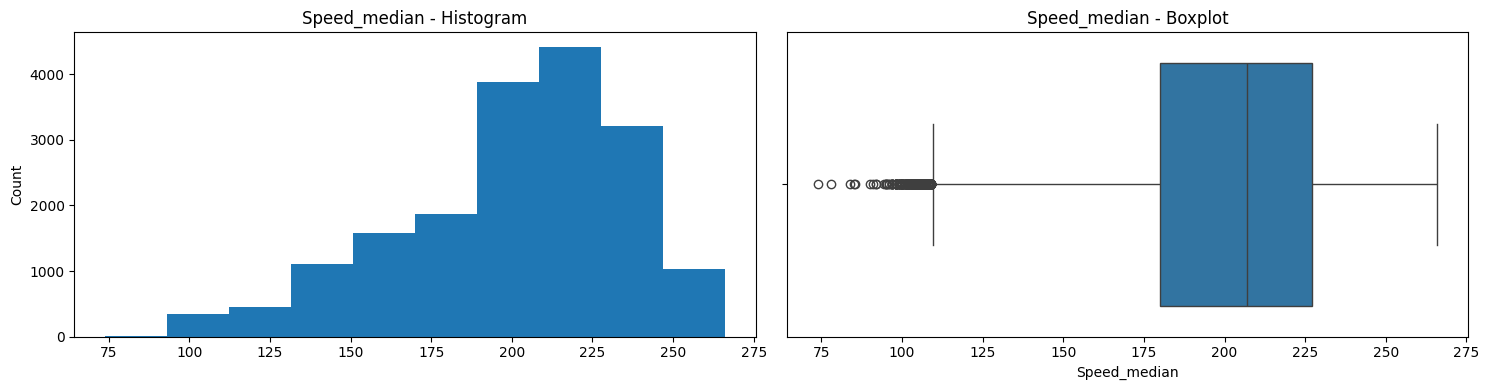


Column: Speed_min
Skew: -1.31


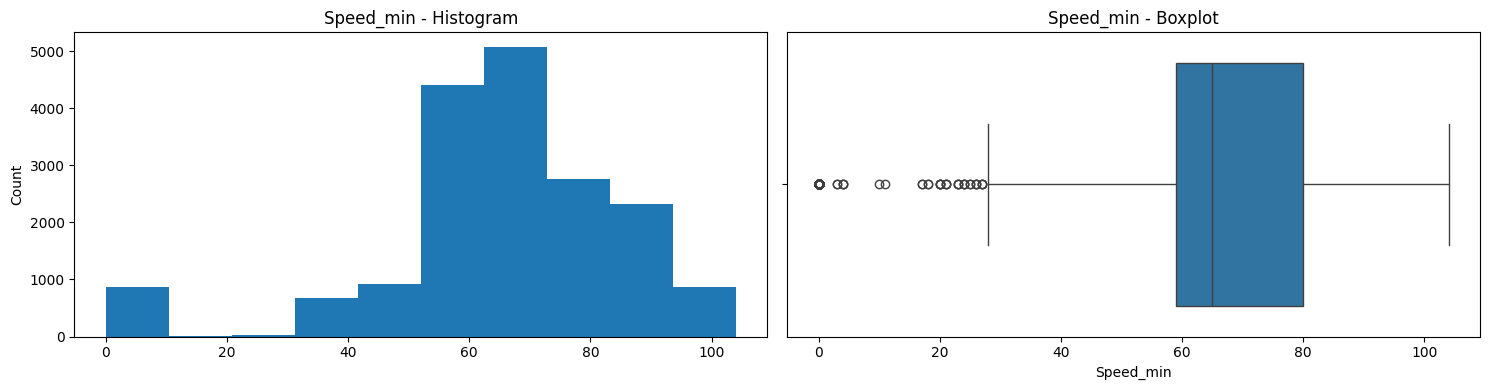


Column: Speed_std
Skew: 0.21


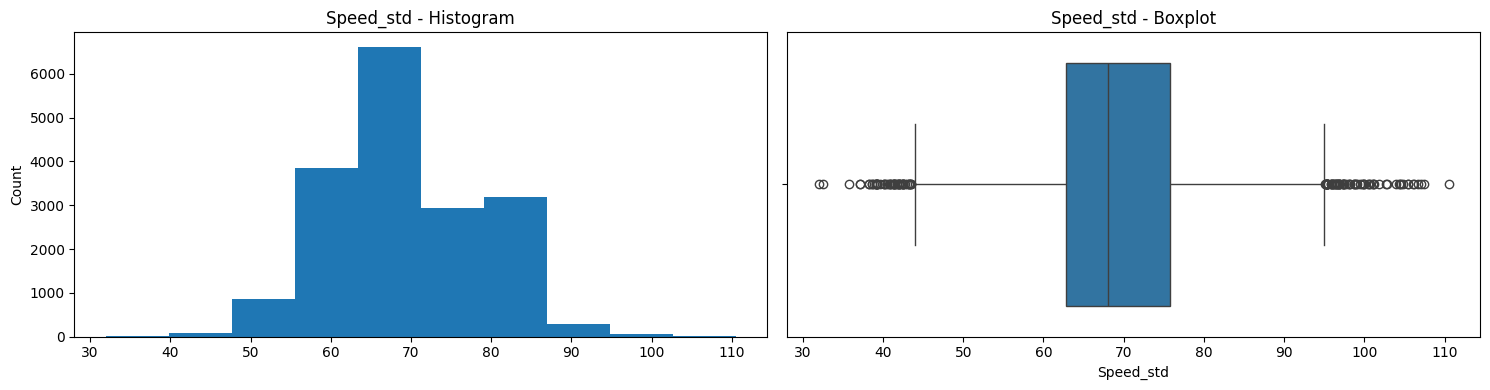


Column: Stint
Skew: 0.85


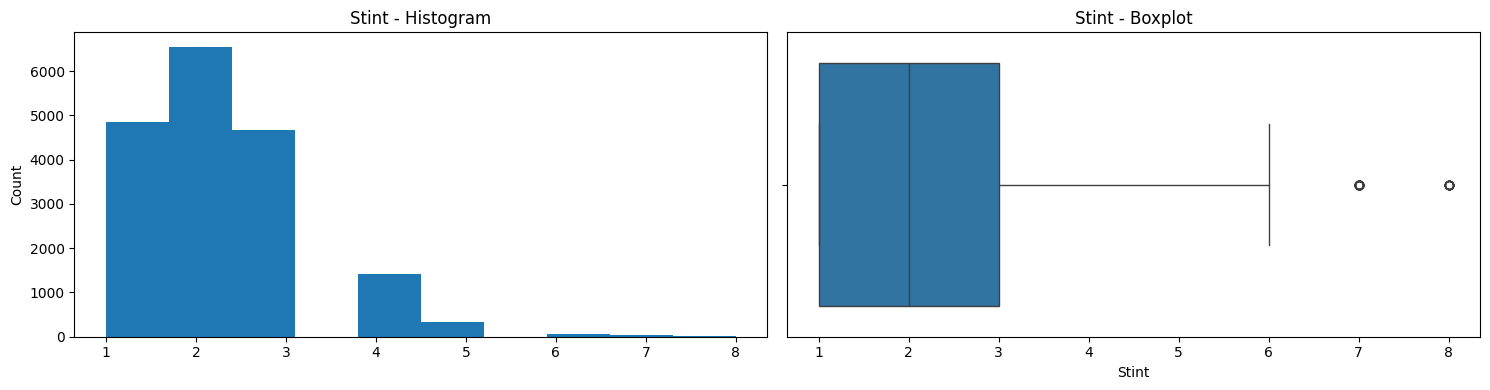


Column: Throttle_max
Skew: -0.21


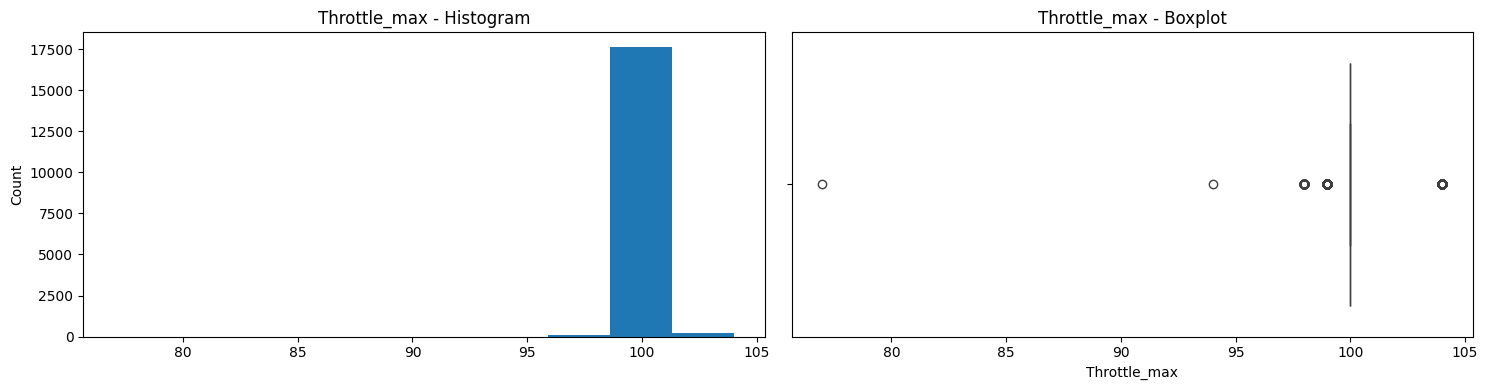


Column: Throttle_mean
Skew: -1.19


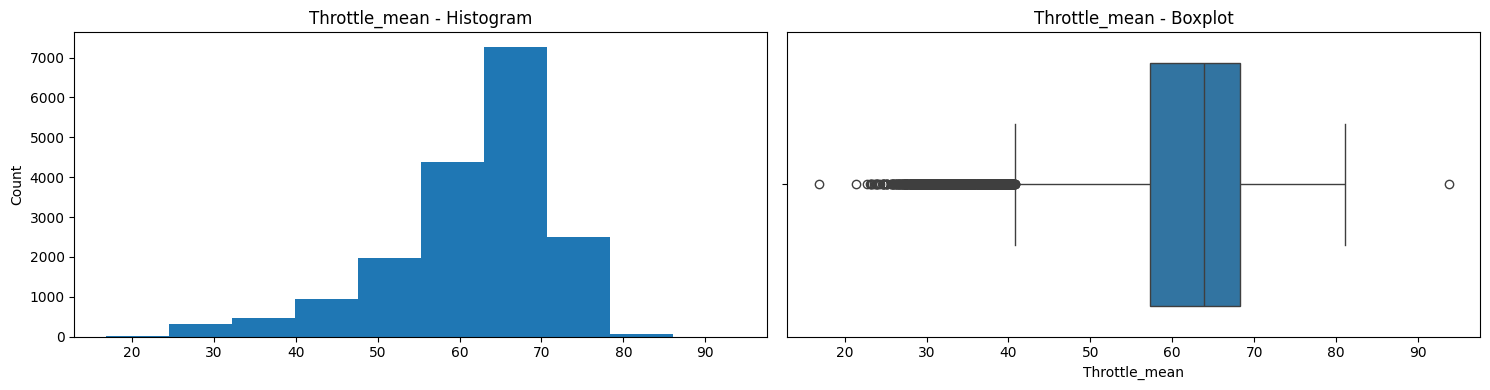


Column: Throttle_median
Skew: -1.27


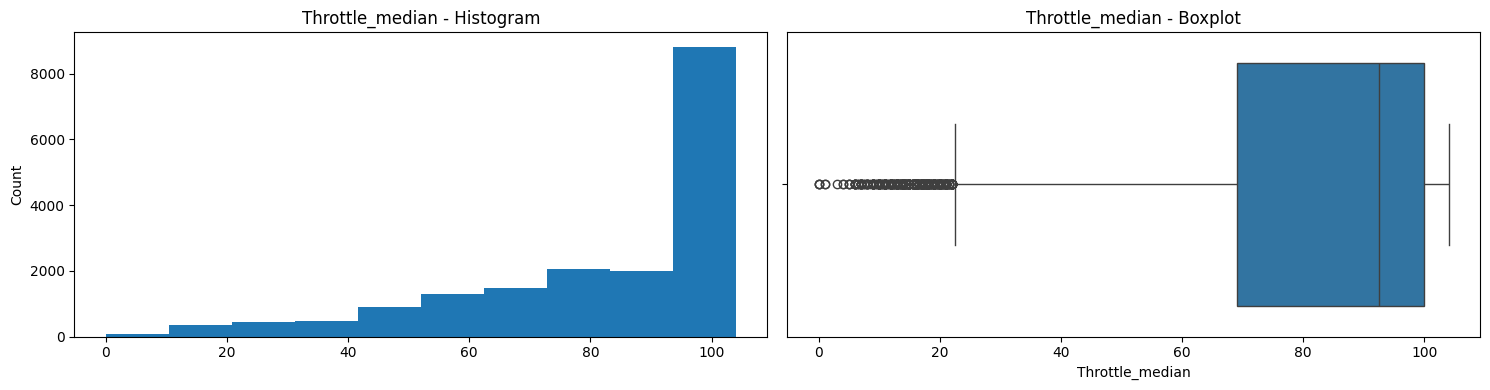


Column: Throttle_min
Skew: 0.0


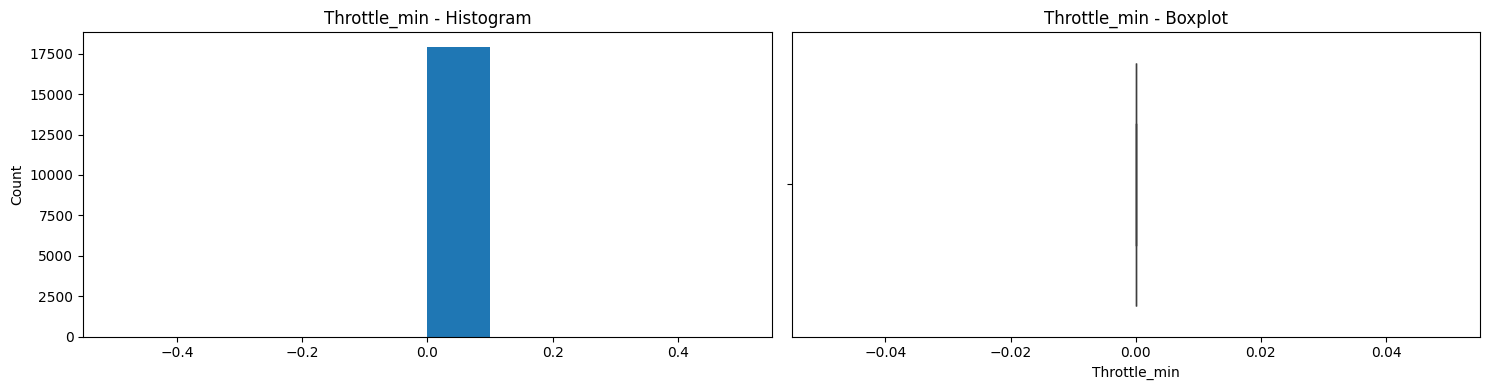


Column: Throttle_std
Skew: -1.96


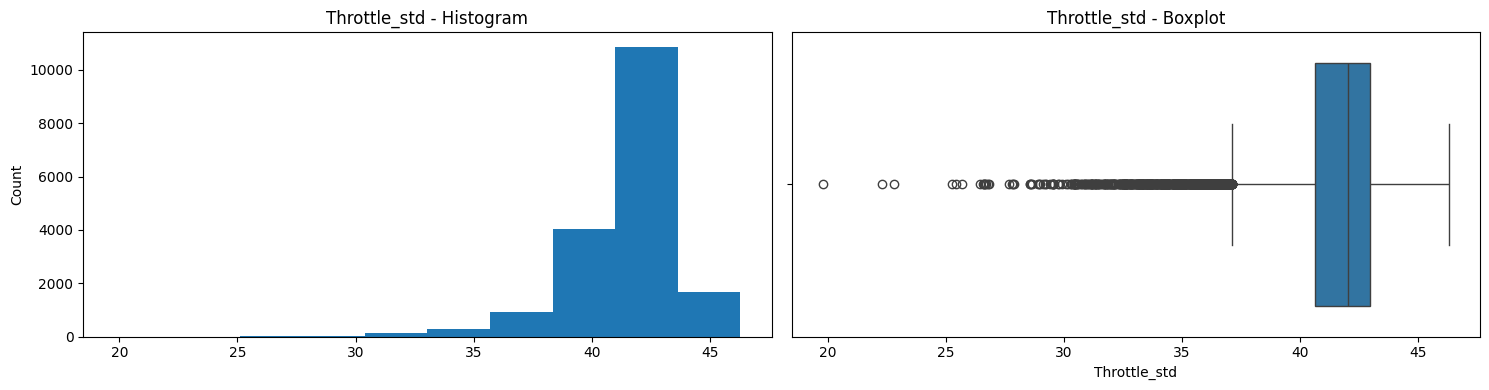


Column: TrackTemp
Skew: 0.02


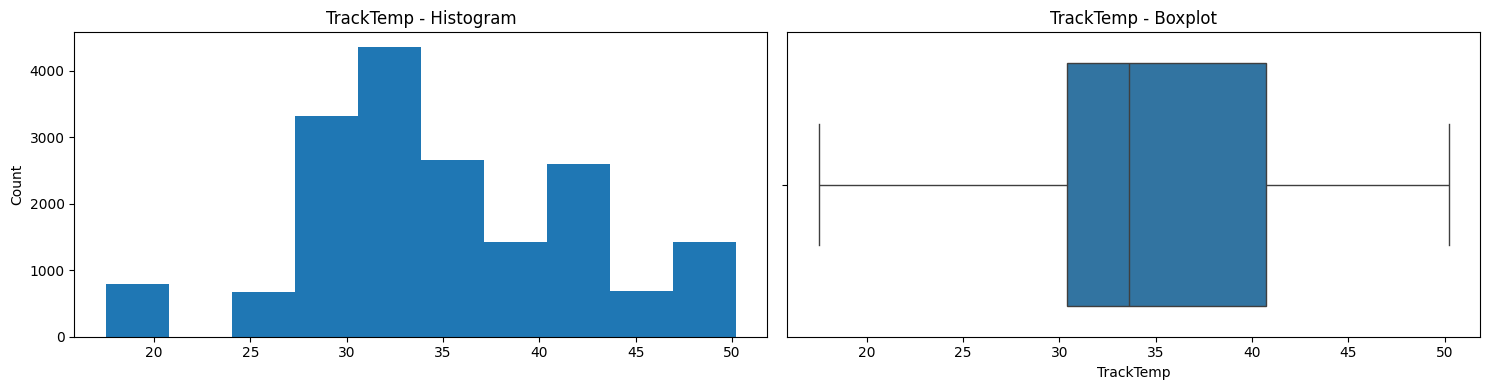


Column: WindSpeed
Skew: 1.26


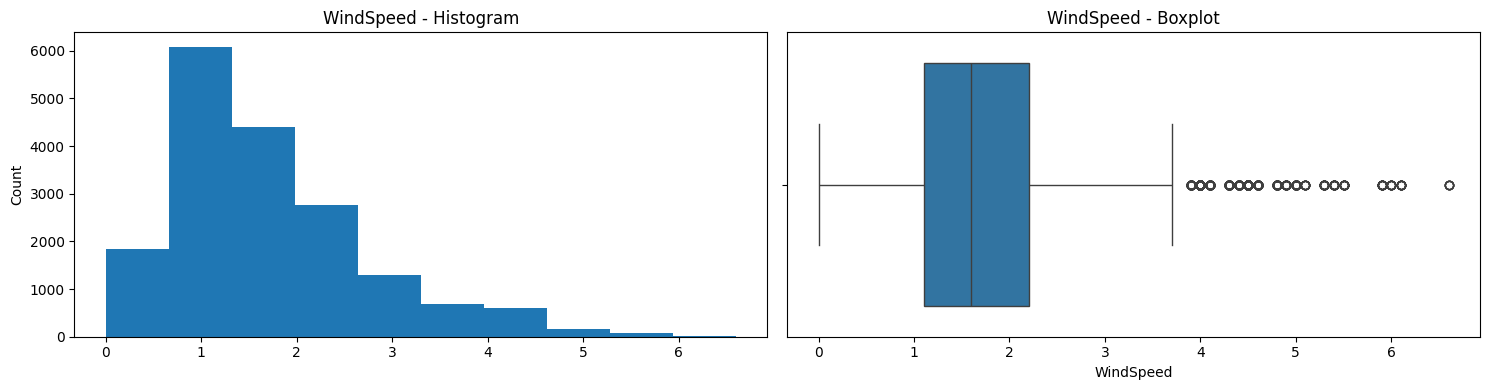


Column: nGear_max
Skew: 56.5


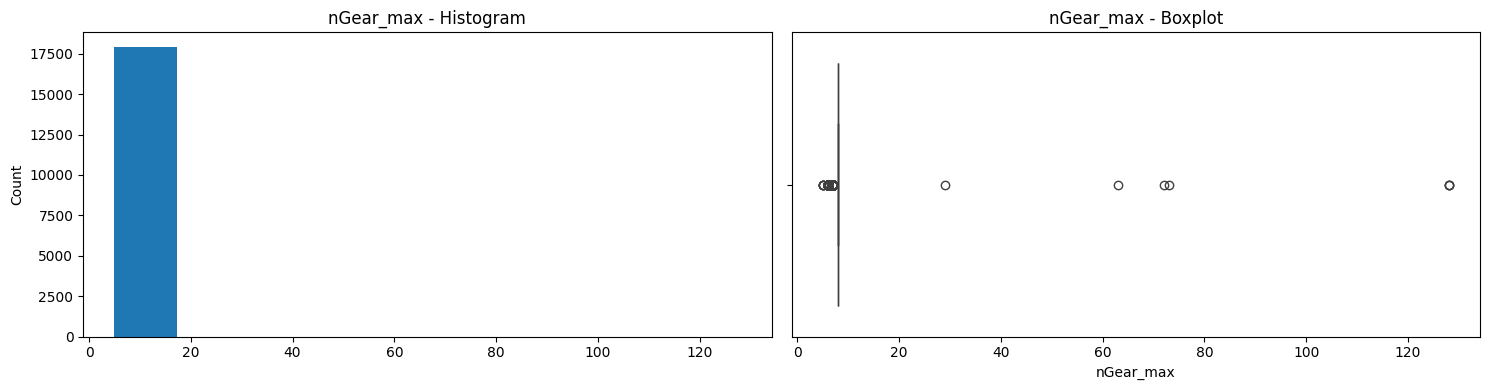


Column: nGear_mean
Skew: 3.69


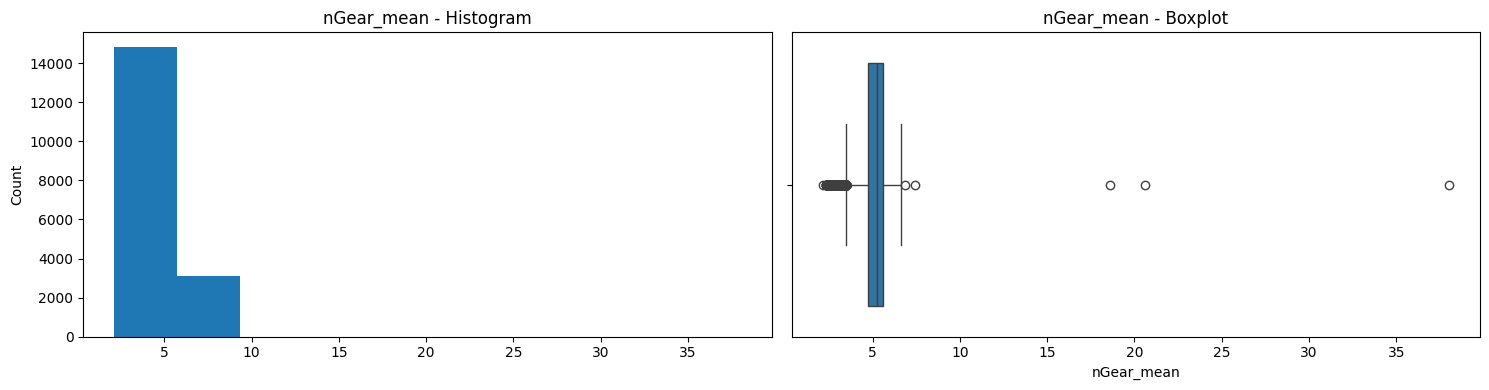


Column: nGear_median
Skew: -0.58


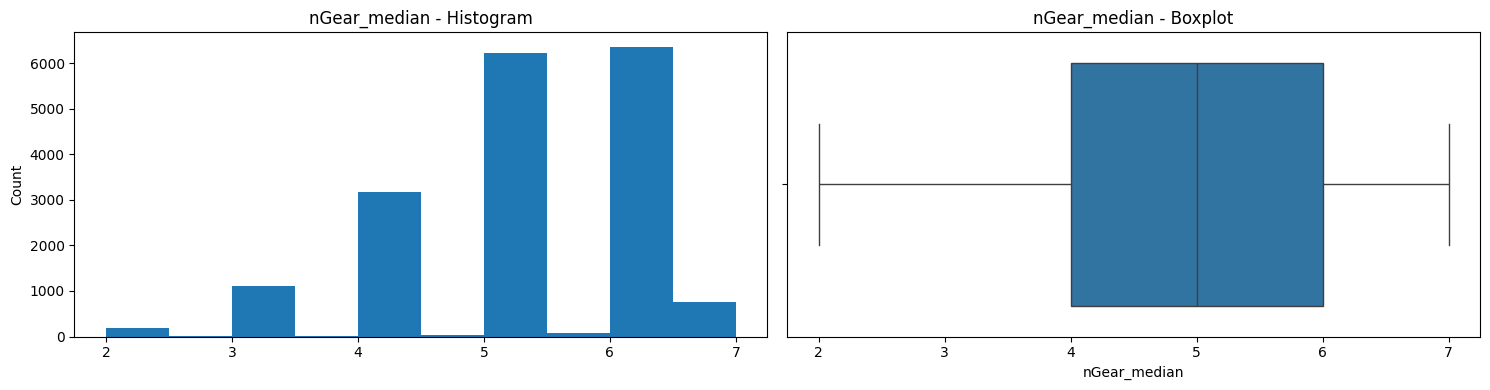


Column: nGear_min
Skew: -0.29


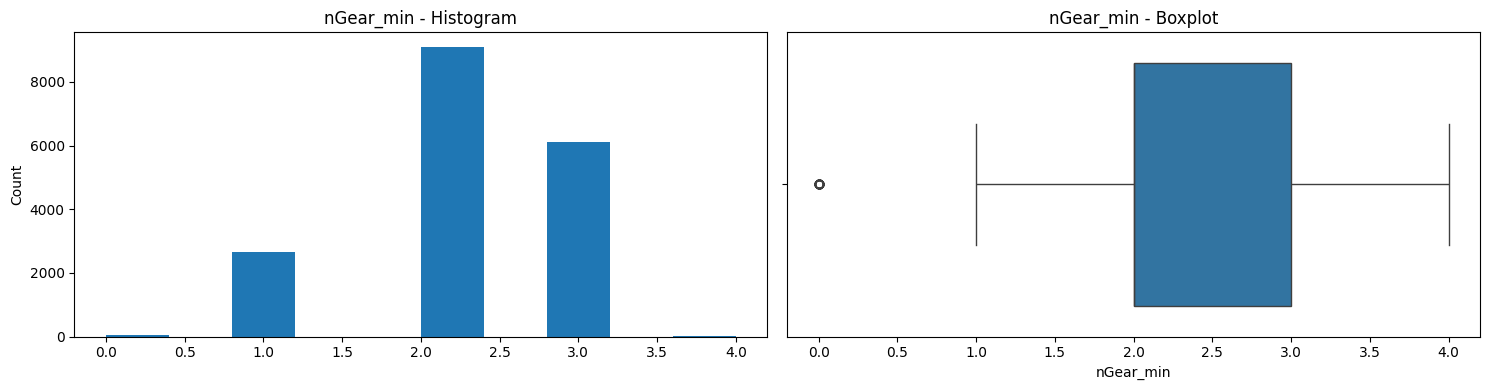


Column: nGear_std
Skew: 56.57


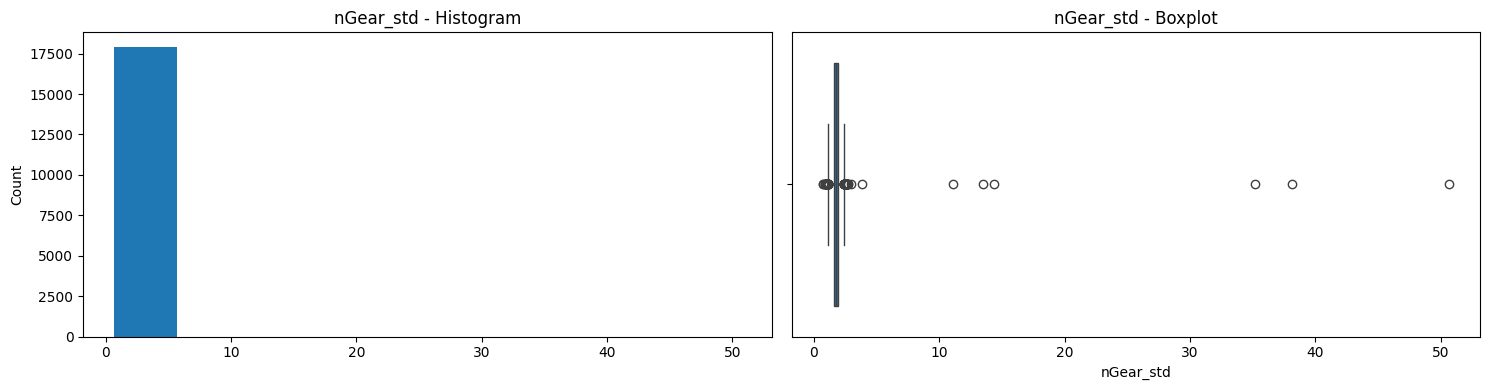

In [175]:
univariate_analysis(laps_df, numerical_columns)


In [176]:
numerical_columns

Index(['AirTemp', 'Brake_mean', 'Brake_median', 'Humidity', 'LapNumber',
       'LapTime', 'LapsOnTyre', 'Position', 'Pressure', 'RPM_max', 'RPM_mean',
       'RPM_median', 'RPM_min', 'RPM_std', 'SpeedAfterSector1',
       'SpeedAfterSector2', 'SpeedAtFinishLine', 'SpeedAtLongestStraight',
       'Speed_max', 'Speed_mean', 'Speed_median', 'Speed_min', 'Speed_std',
       'Stint', 'Throttle_max', 'Throttle_mean', 'Throttle_median',
       'Throttle_min', 'Throttle_std', 'TrackTemp', 'WindSpeed', 'nGear_max',
       'nGear_mean', 'nGear_median', 'nGear_min', 'nGear_std'],
      dtype='object')

In [177]:
irrelevant_numerical_columns = ['Brake_median', 'Throttle_max', 'Throttle_median', 'Throttle_min', 'nGear_max', 'nGear_mean', 'nGear_std']
columns_to_categorise = ['Pressure', 'SpeedAfterSector1', 'SpeedAfterSector2']
skewed_columns = ['Brake_mean', 'Humidity', 'LapTime', 'LapsOnTyre', 'RPM_max', 'RPM_mean', 'RPM_median', 'RPM_min', 'RPM_std', 
                  'SpeedAtFinishLine', 'SpeedAtLongestStraight', 'Speed_max', 'Speed_mean', 'Speed_median', 'Speed_min', 'Speed_std',
                  'Throttle_mean', 'Throttle_std', 'WindSpeed', 'nGear_median', 'Stint', 'nGear_min']
strange_columns = ['AirTemp', 'TrackTemp']

In [178]:
laps_df = laps_df.drop(columns=irrelevant_numerical_columns)
numerical_columns = laps_df.columns.difference(categorical_columns)


Column: Pressure
Skew: -2.66


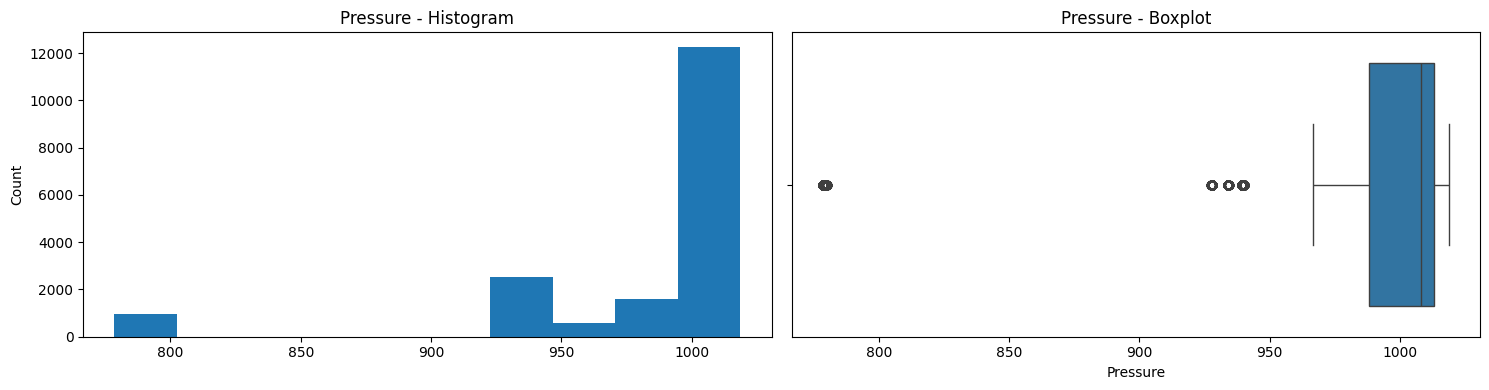


Column: SpeedAfterSector1
Skew: -0.7


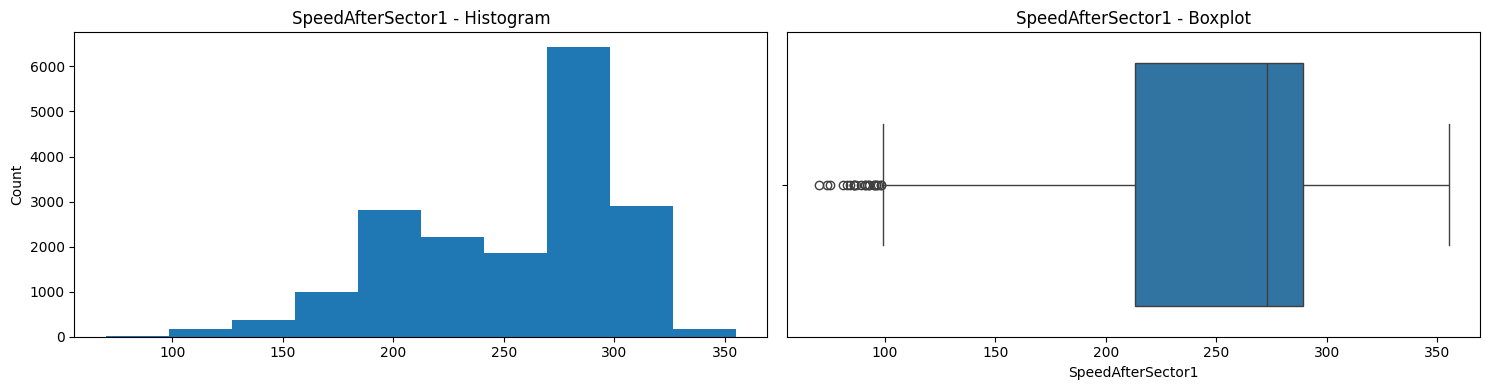


Column: SpeedAfterSector2
Skew: -0.41


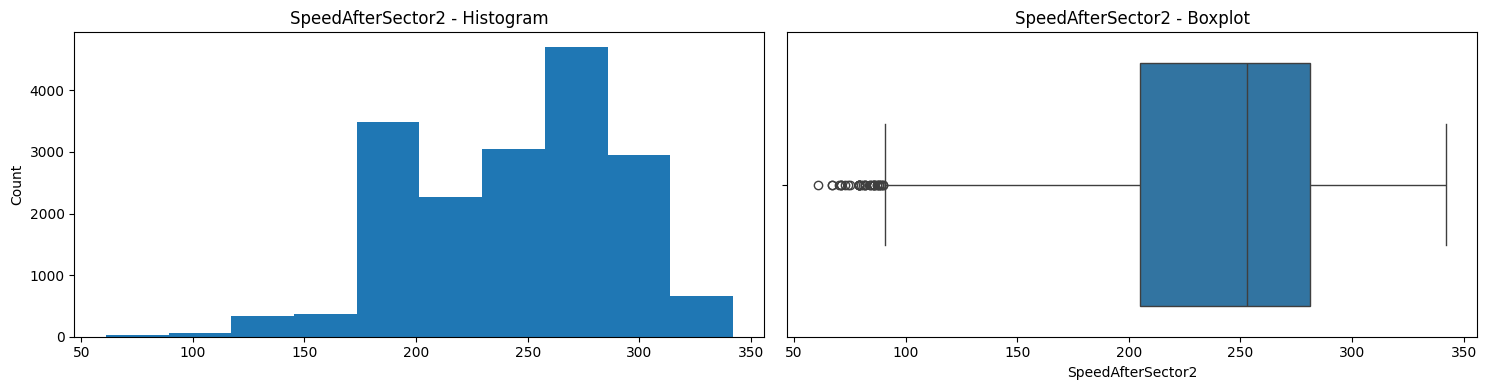

In [179]:
univariate_analysis(laps_df, columns_to_categorise)

In [180]:
laps_df['Pressure'].describe()

count    17927.000000
mean       983.981977
std         56.069732
min        778.500000
25%        988.200000
50%       1008.200000
75%       1013.000000
max       1018.700000
Name: Pressure, dtype: float64

In [181]:
pressure_bins = [float('-inf'), 900, 1013, float('inf')]
pressure_labels = ['Very Low', 'Low', 'Normal']
laps_df['Pressure_Category'] = pd.cut(laps_df['Pressure'], bins=pressure_bins, labels=pressure_labels)
laps_df = laps_df.drop(columns = ['Pressure'])

In [182]:
laps_df['SpeedAfterSector2'].describe()

count    17927.000000
mean       243.970826
std         47.352859
min         61.000000
25%        205.000000
50%        253.000000
75%        281.000000
max        342.000000
Name: SpeedAfterSector2, dtype: float64

In [183]:
laps_df['SpeedAfterSector1IsFast'] = laps_df['SpeedAfterSector1'] >= 250
laps_df['SpeedAfterSector2IsFast'] = laps_df['SpeedAfterSector2'] >= 240
laps_df = laps_df.drop(columns=['SpeedAfterSector1', 'SpeedAfterSector2'])


Column: Brake_mean
Skew: 0.87


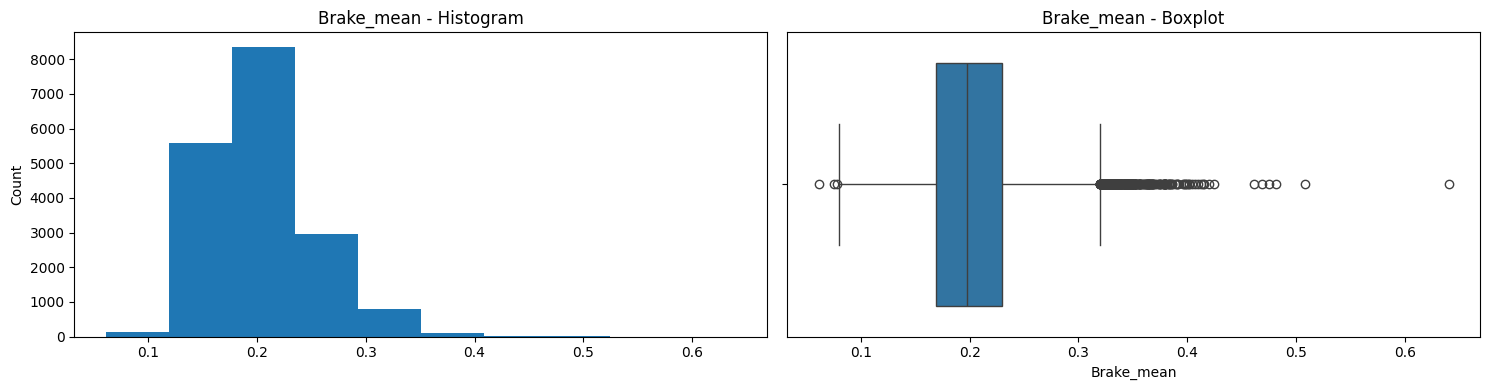


Column: Humidity
Skew: -0.5


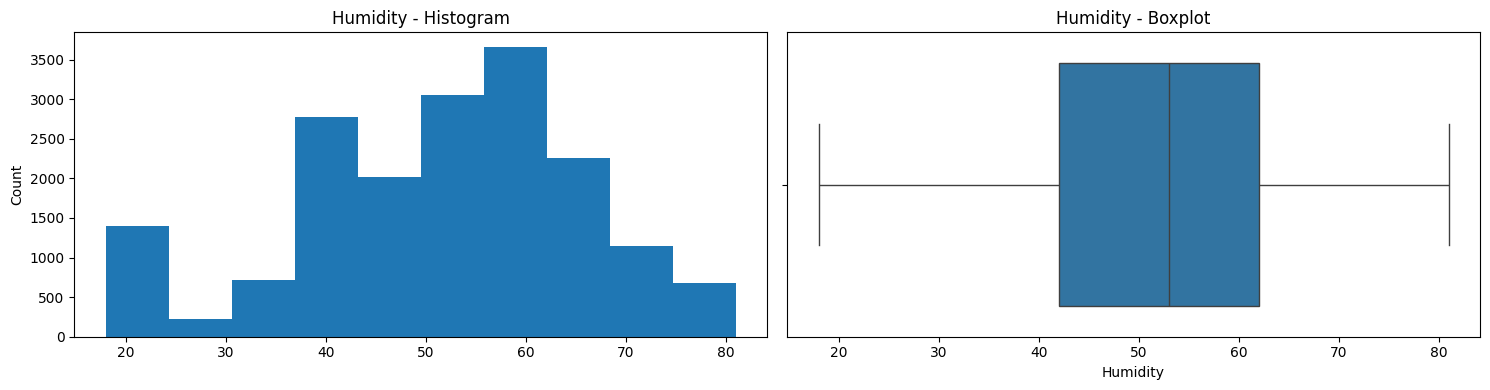


Column: LapTime
Skew: 0.96


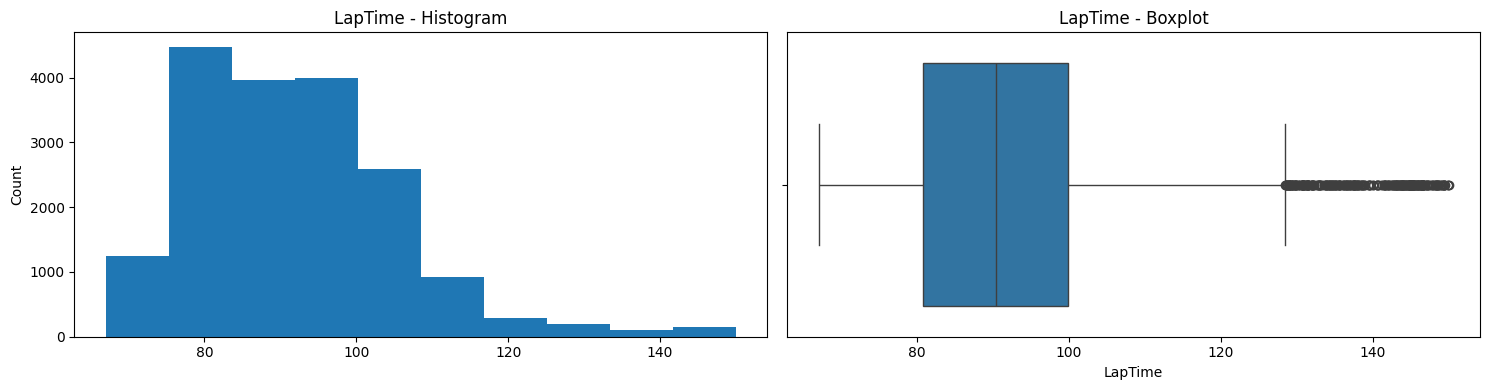


Column: LapsOnTyre
Skew: 1.09


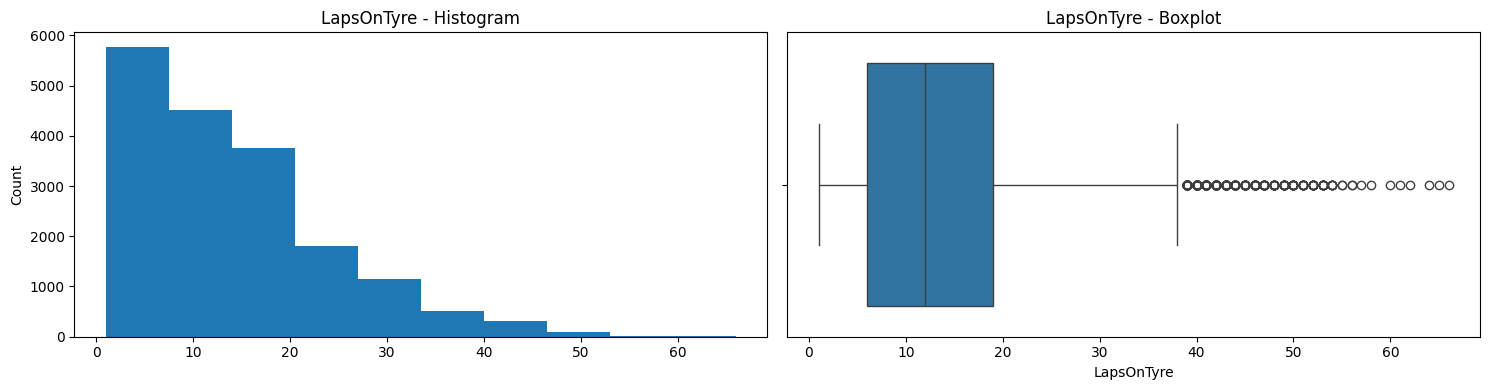


Column: RPM_max
Skew: 0.88


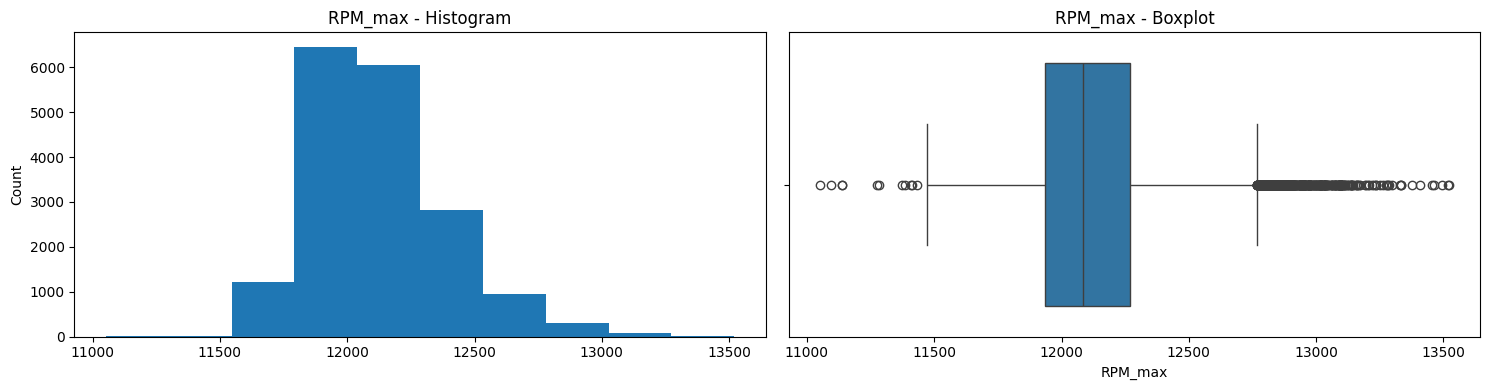


Column: RPM_mean
Skew: -1.37


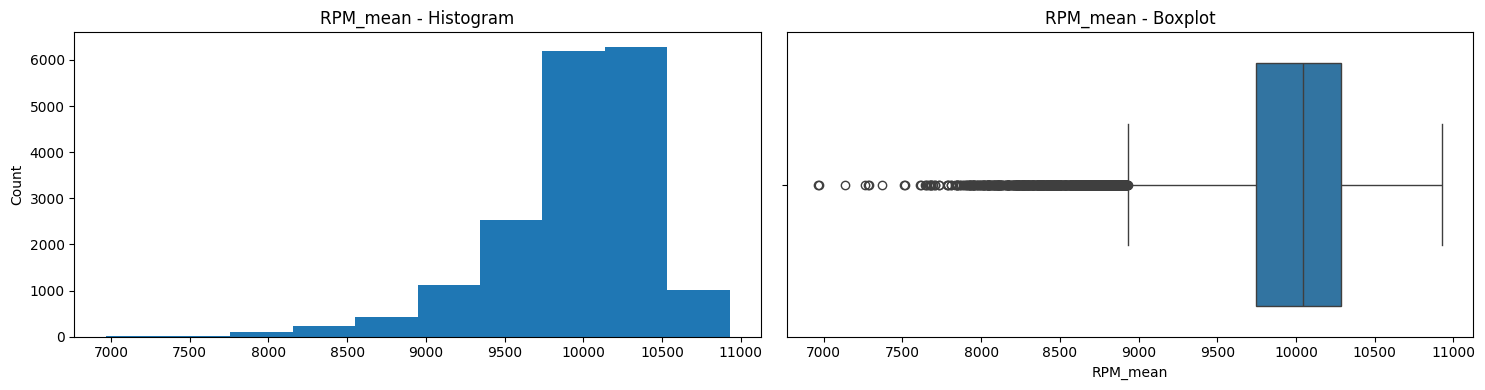


Column: RPM_median
Skew: -2.2


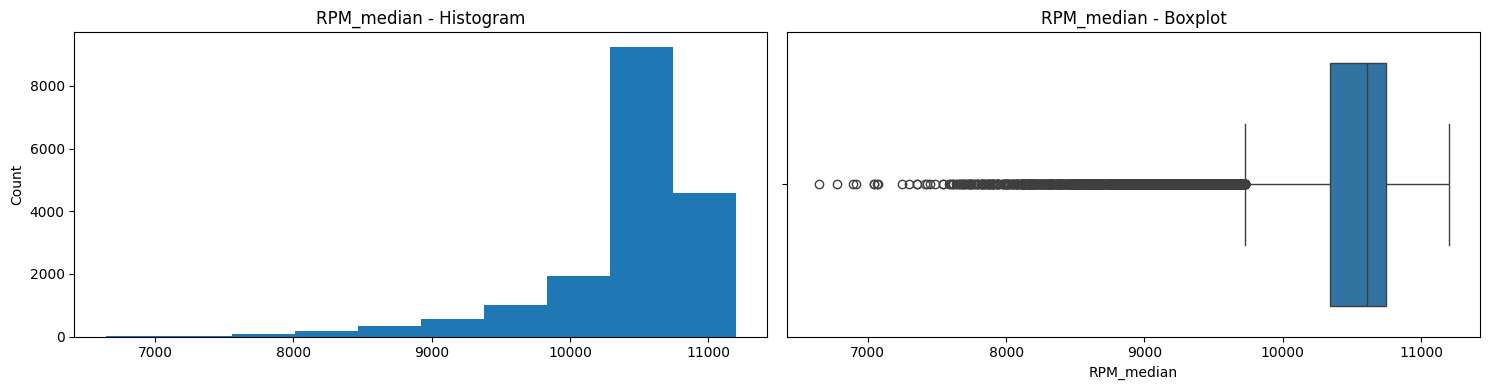


Column: RPM_min
Skew: -0.2


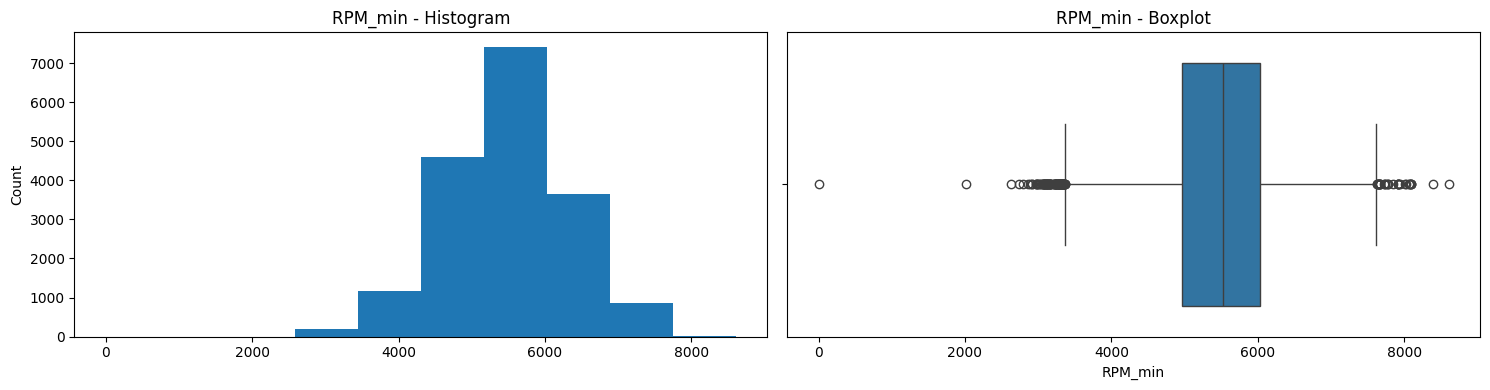


Column: RPM_std
Skew: 0.35


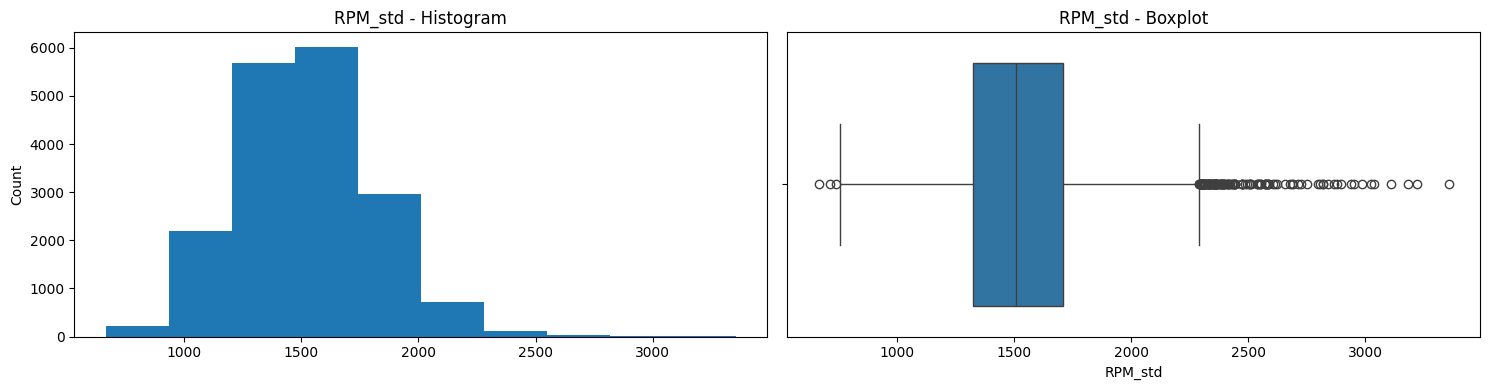


Column: SpeedAtFinishLine
Skew: -0.73


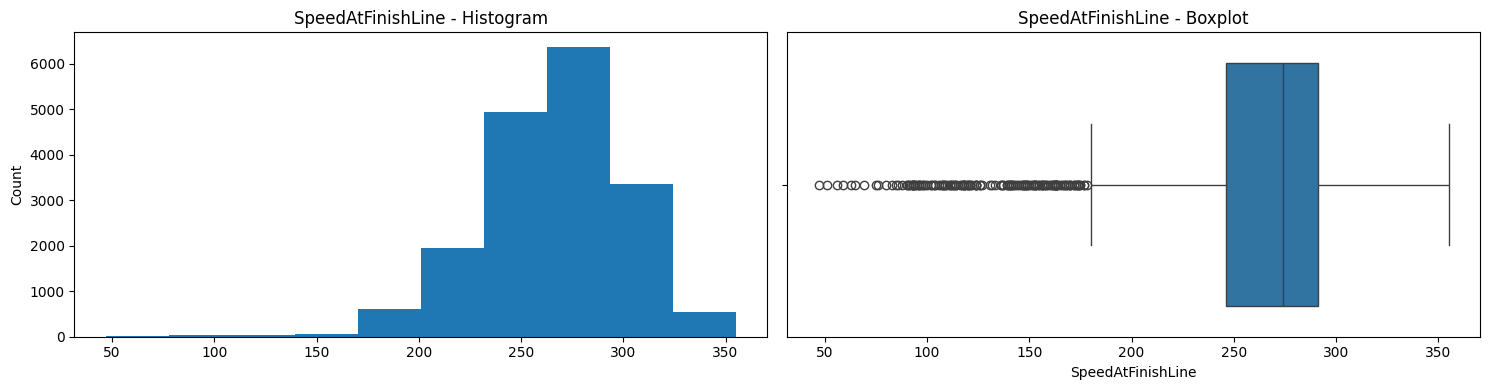


Column: SpeedAtLongestStraight
Skew: -2.83


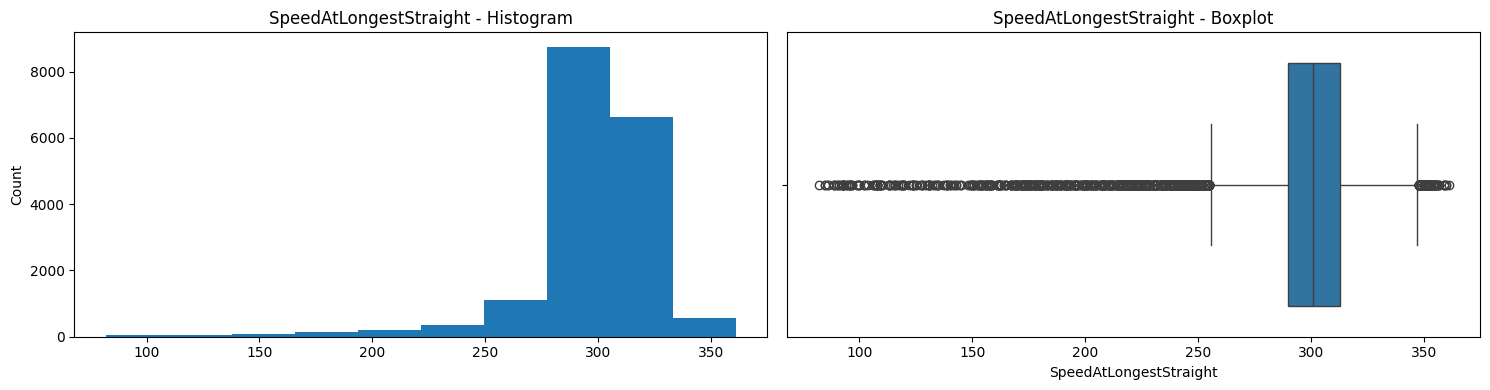


Column: Speed_max
Skew: -0.33


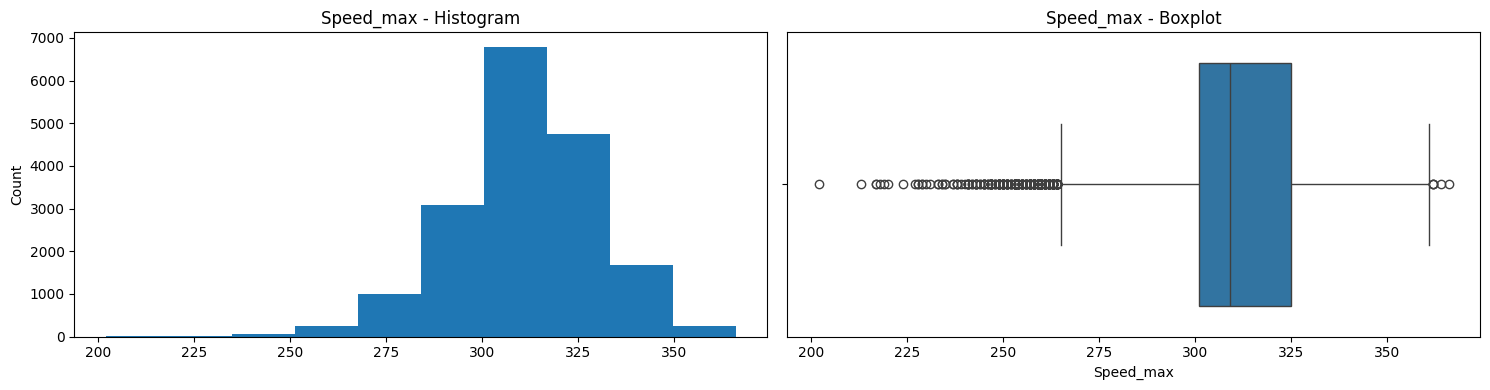


Column: Speed_mean
Skew: -0.97


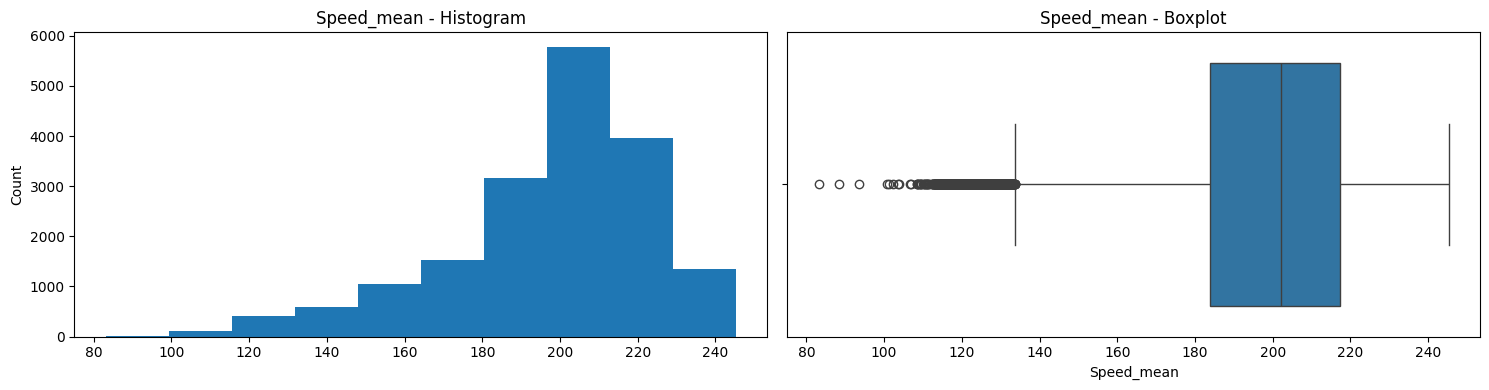


Column: Speed_median
Skew: -0.77


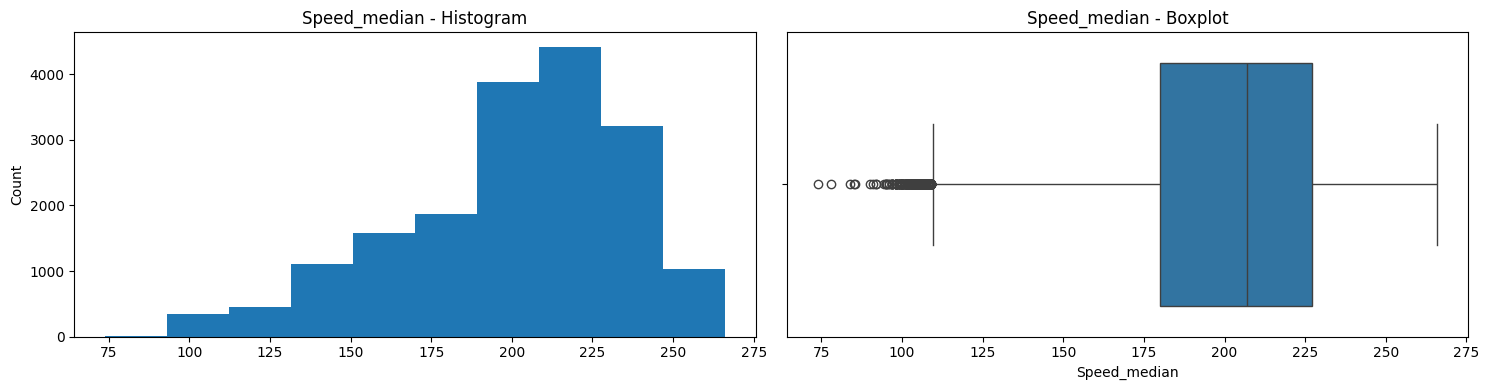


Column: Speed_min
Skew: -1.31


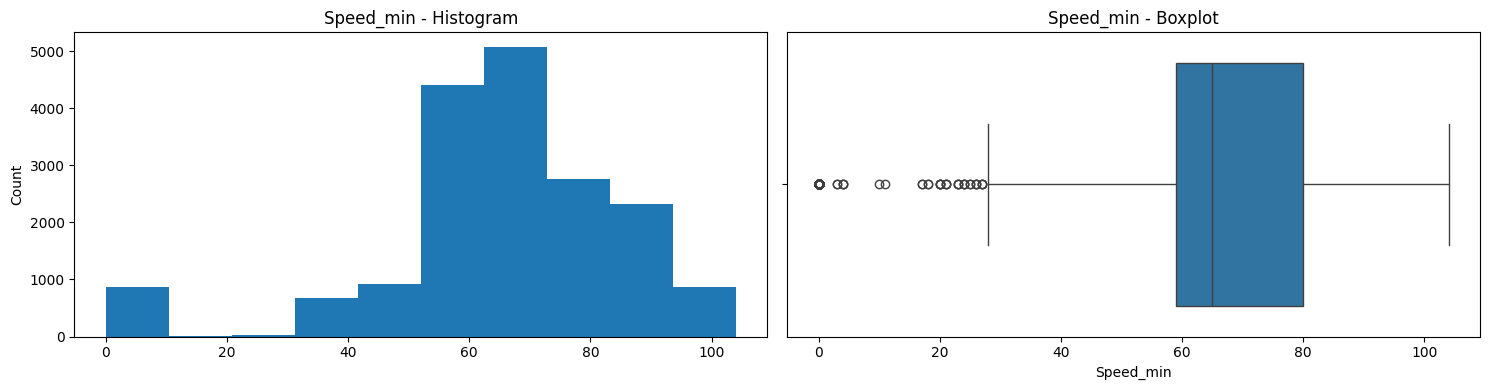


Column: Speed_std
Skew: 0.21


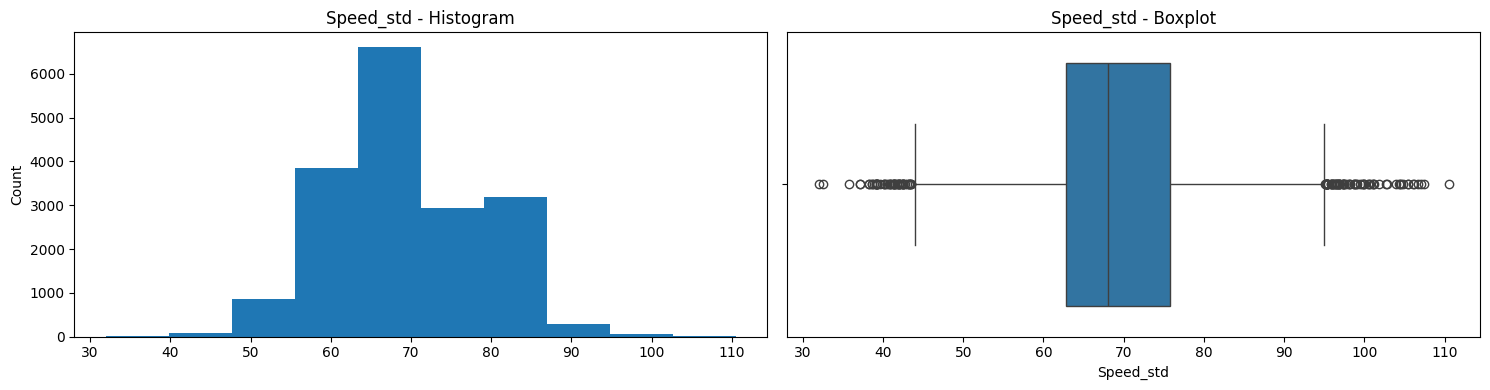


Column: Throttle_mean
Skew: -1.19


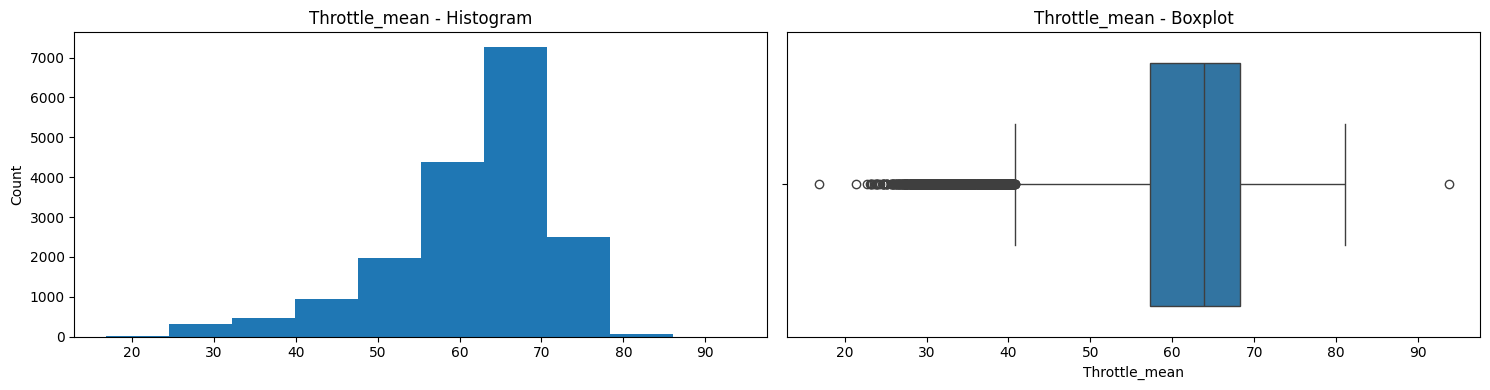


Column: Throttle_std
Skew: -1.96


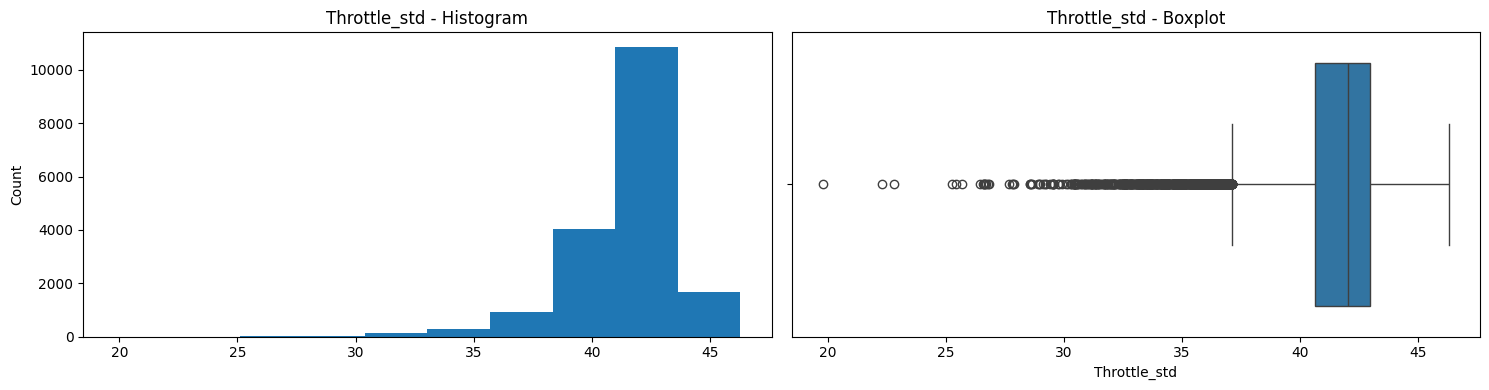


Column: WindSpeed
Skew: 1.26


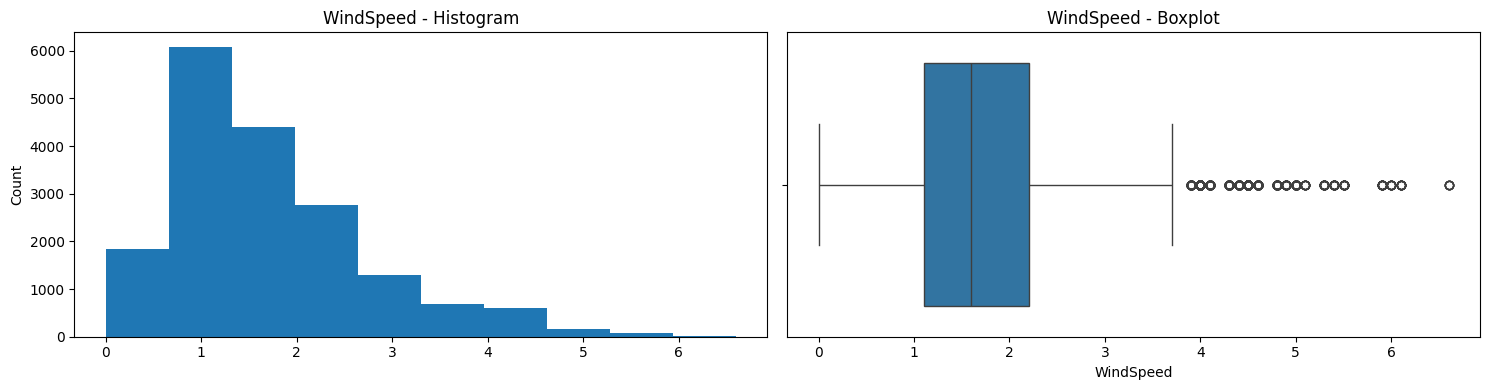


Column: nGear_median
Skew: -0.58


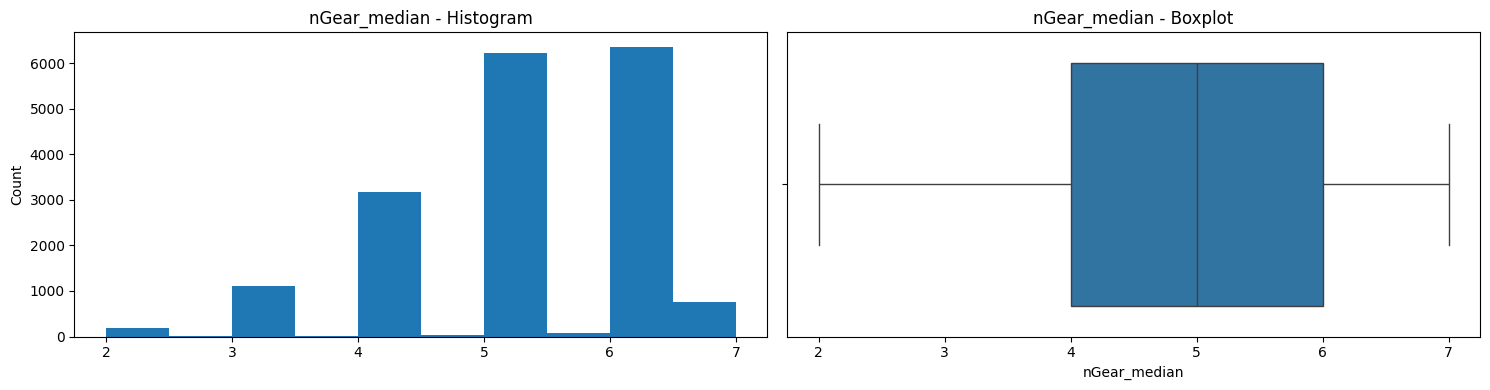


Column: Stint
Skew: 0.85


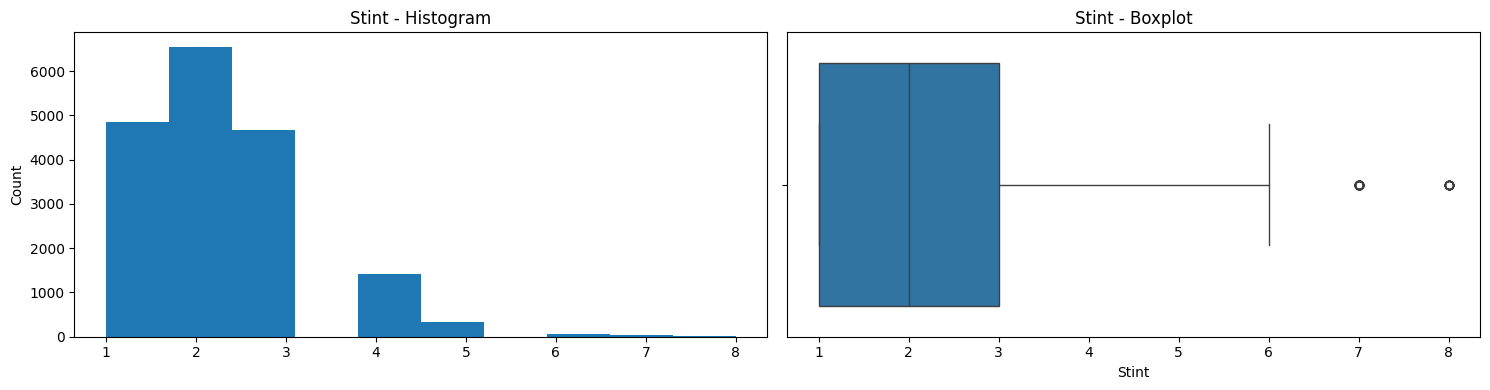


Column: nGear_min
Skew: -0.29


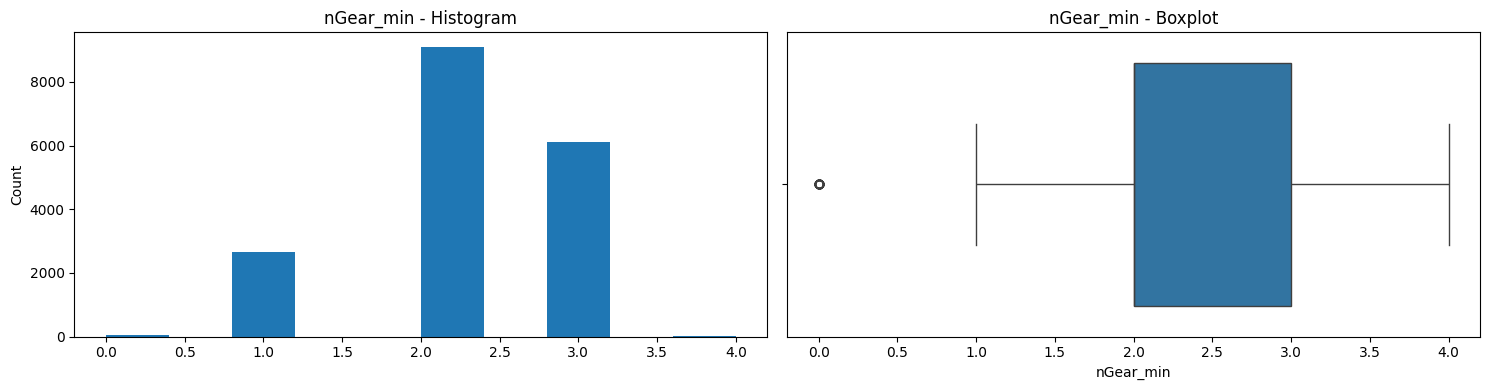

In [184]:
univariate_analysis(laps_df, columns=skewed_columns)

In [185]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return column[(column >= lower_bound) & (column <= upper_bound)]


Column: Brake_mean
Skew: 0.3


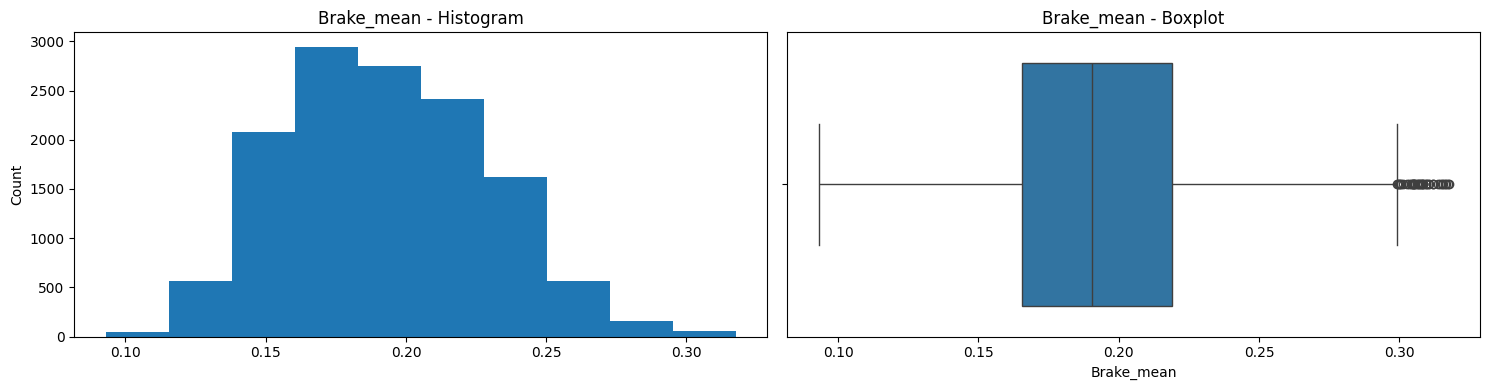


Column: Humidity
Skew: -0.54


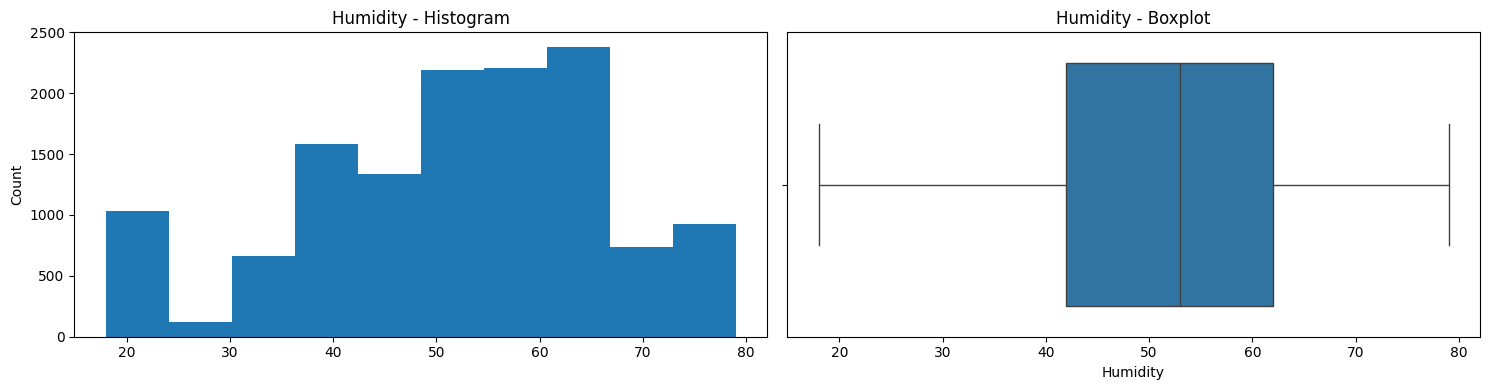


Column: LapTime
Skew: 0.24


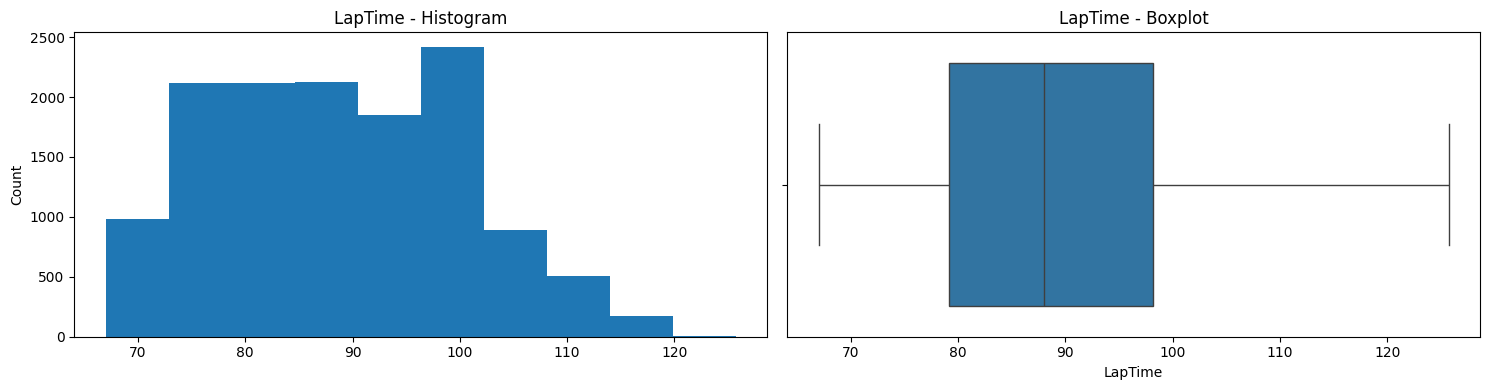


Column: LapsOnTyre
Skew: 0.74


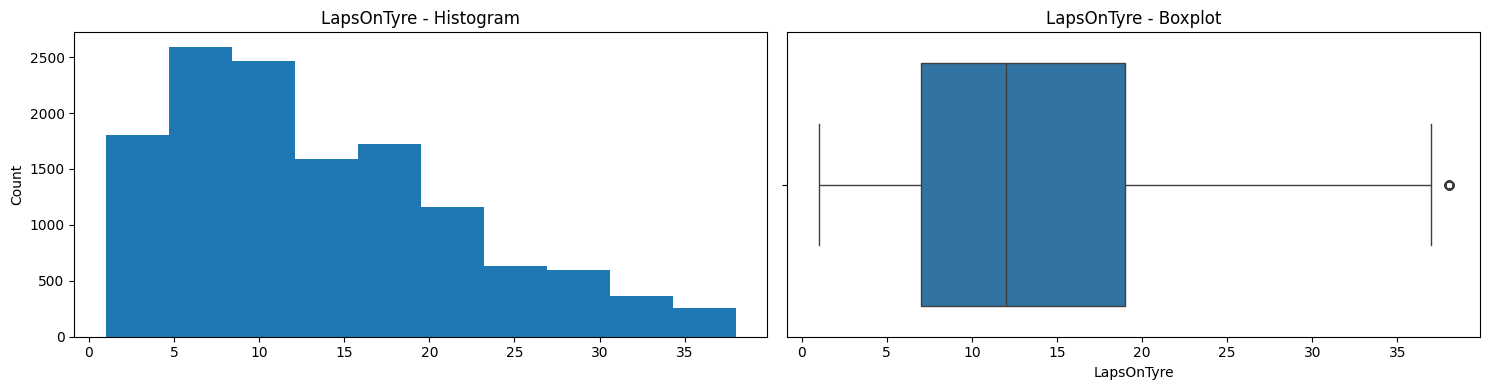


Column: RPM_max
Skew: 0.49


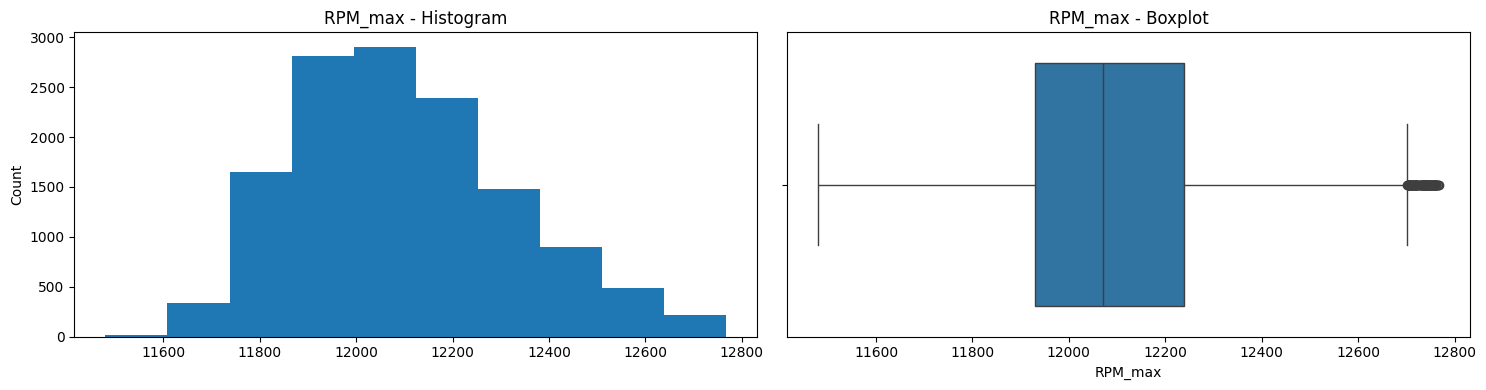


Column: RPM_mean
Skew: -0.31


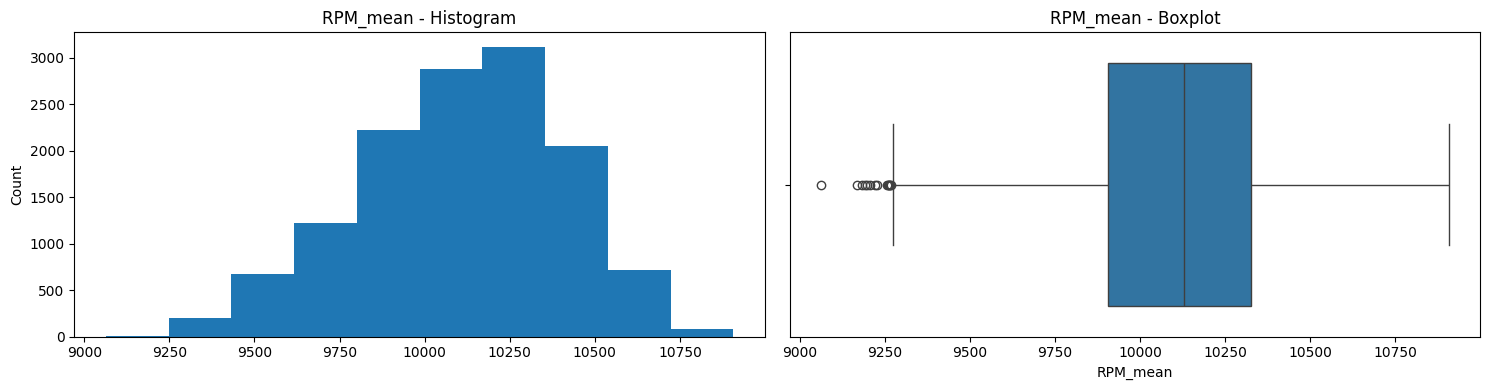


Column: RPM_median
Skew: -1.04


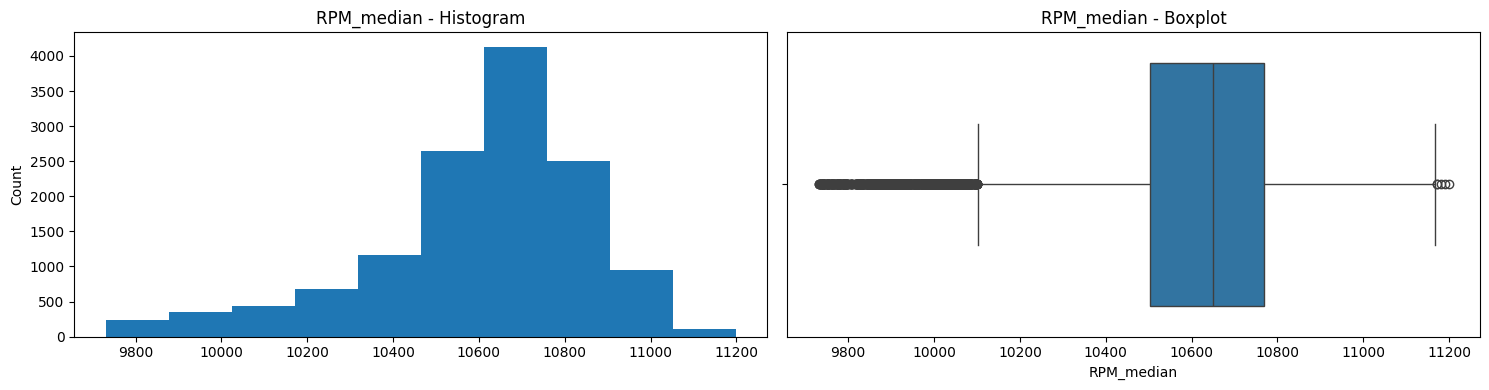


Column: RPM_min
Skew: 0.23


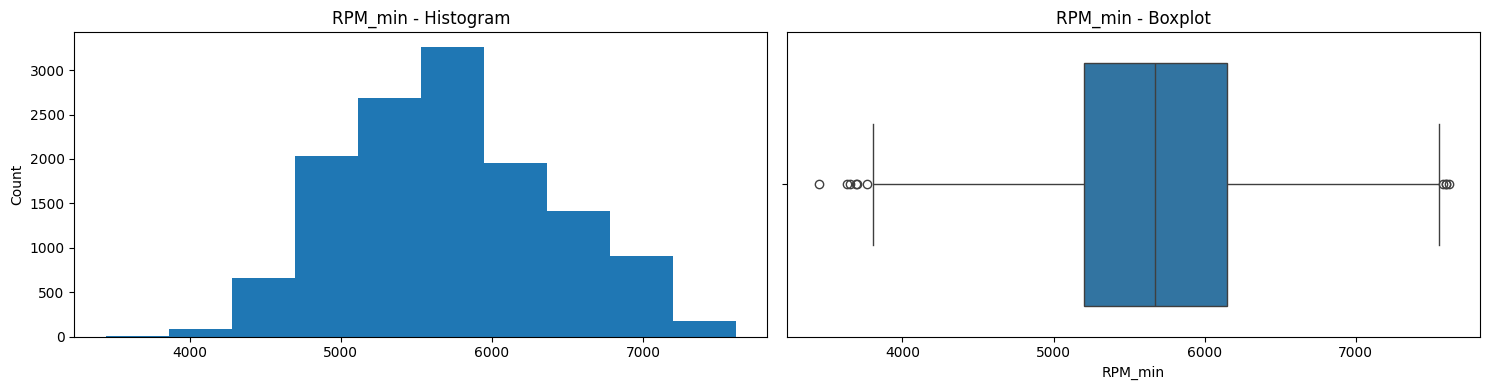


Column: RPM_std
Skew: -0.01


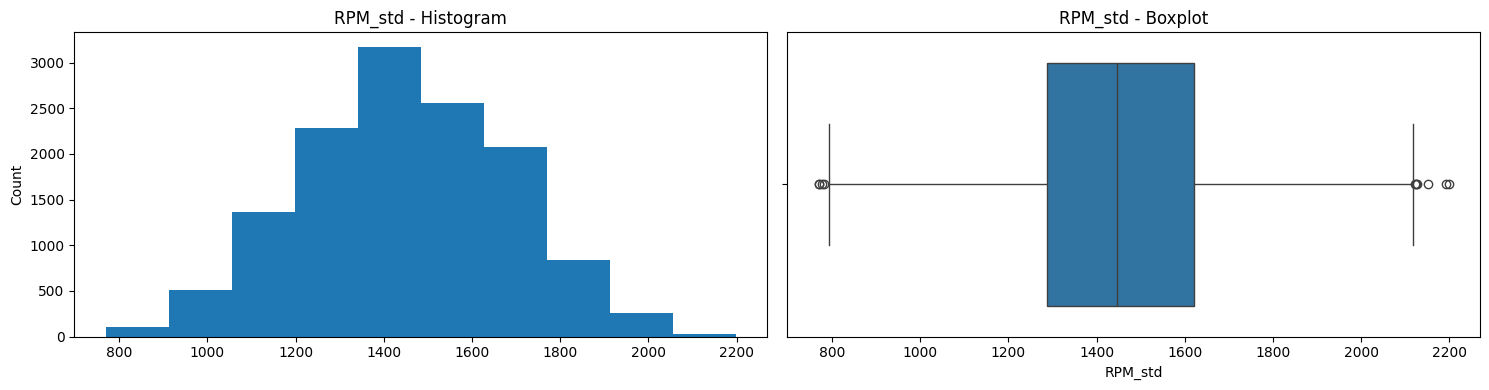


Column: SpeedAtFinishLine
Skew: -0.39


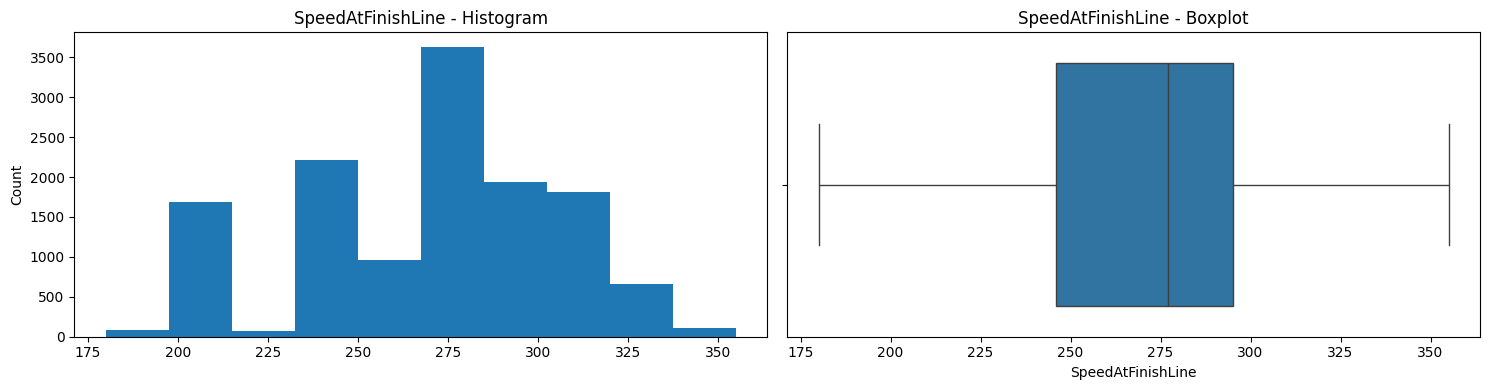


Column: SpeedAtLongestStraight
Skew: 0.14


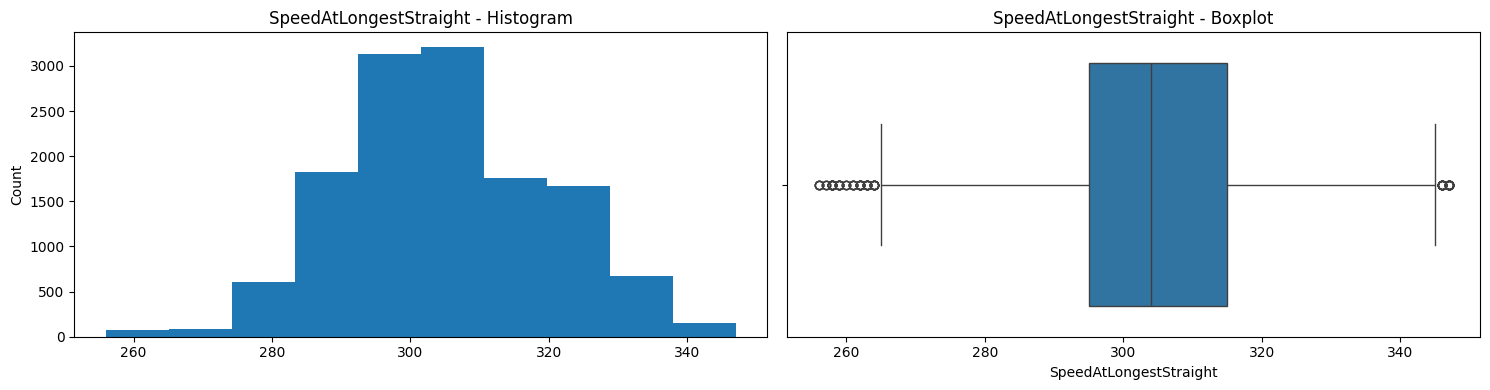


Column: Speed_max
Skew: 0.31


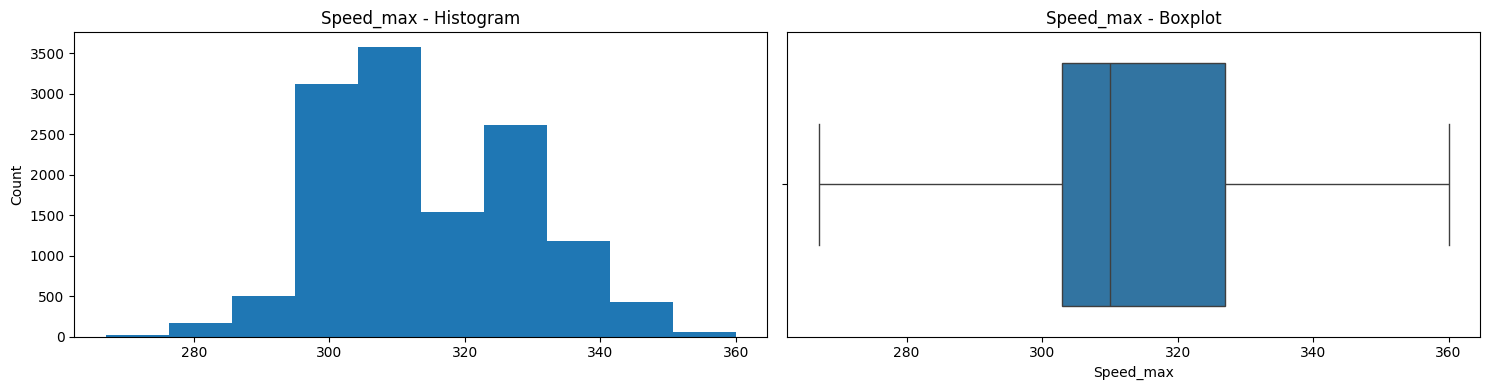


Column: Speed_mean
Skew: -0.42


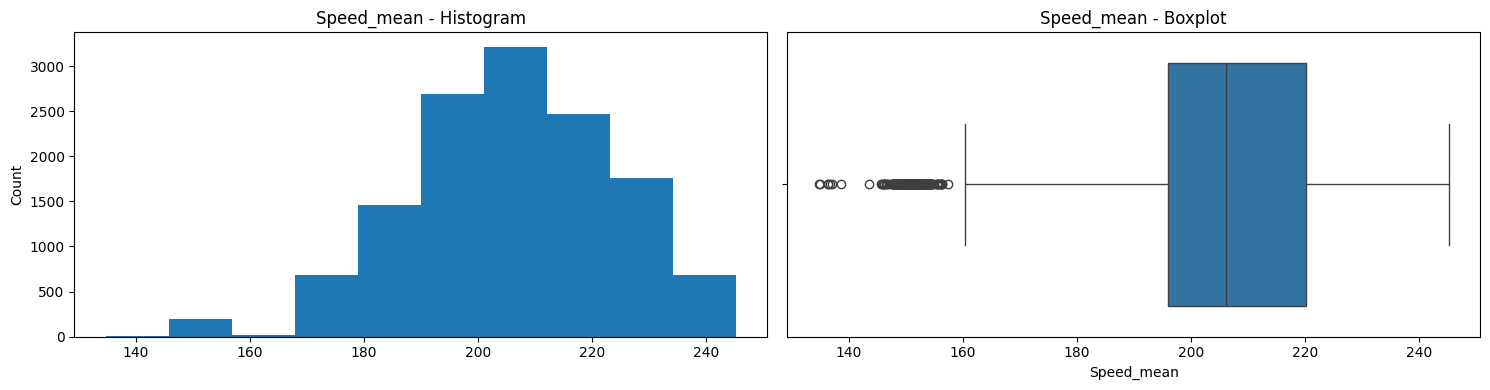


Column: Speed_median
Skew: -0.45


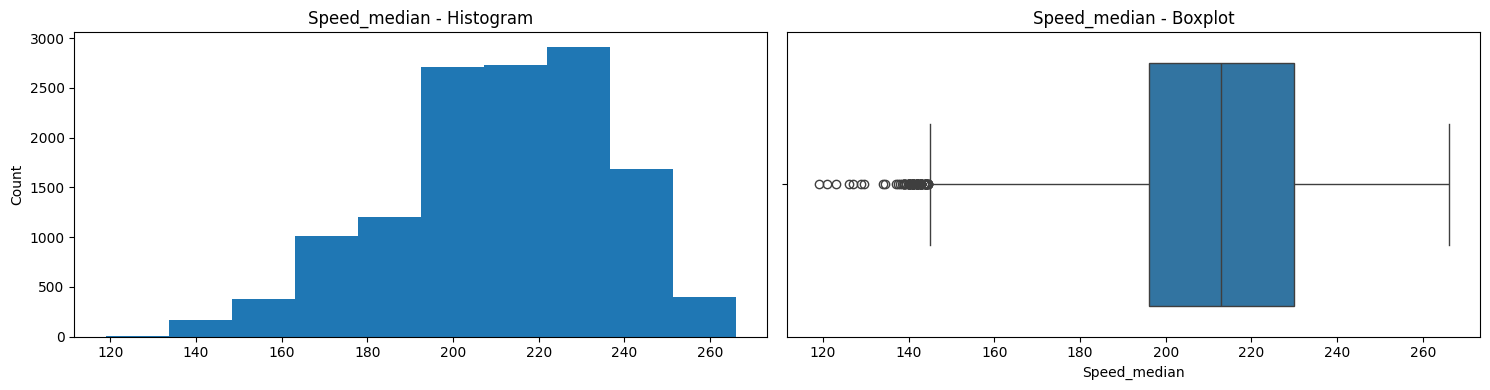


Column: Speed_min
Skew: 0.39


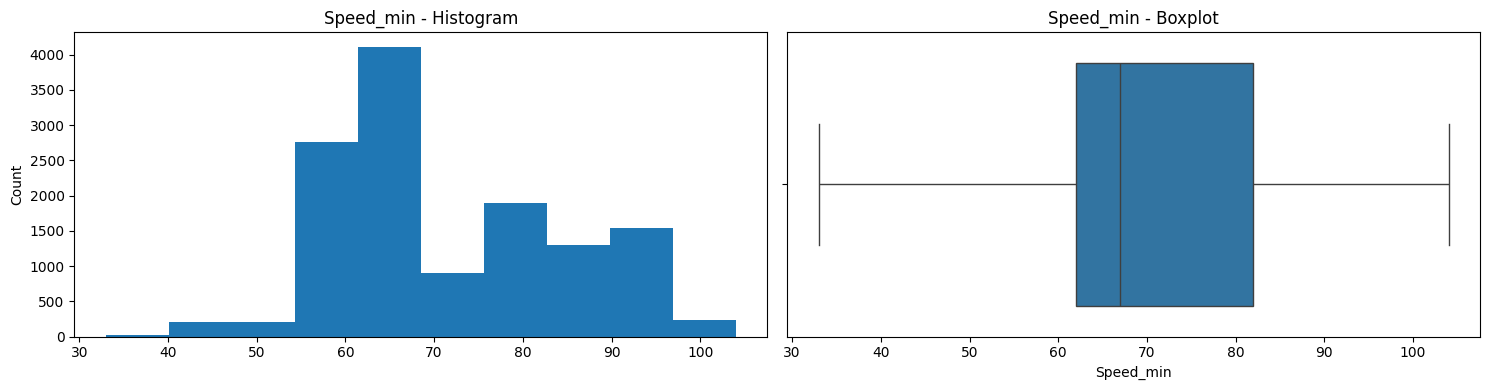


Column: Speed_std
Skew: 0.14


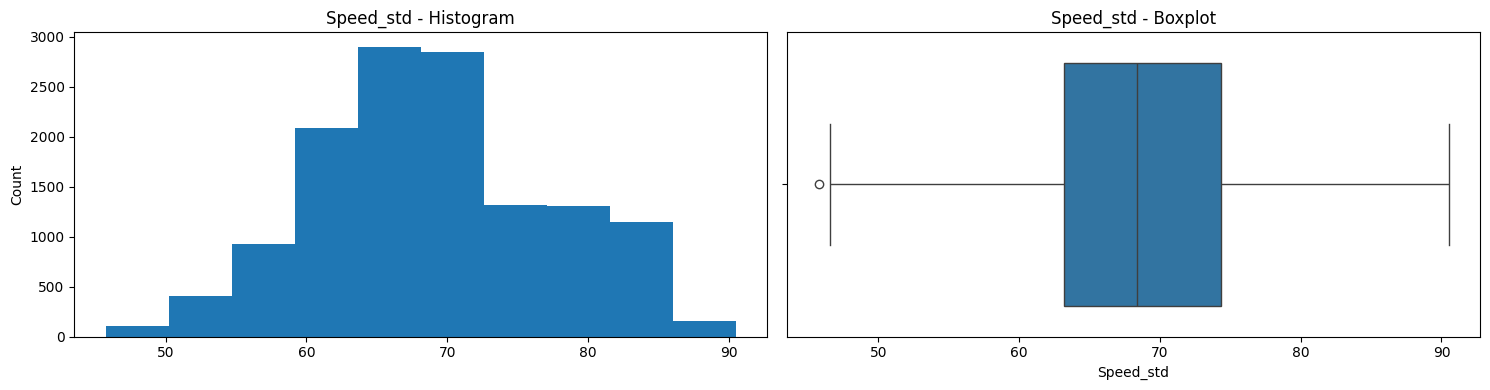


Column: Throttle_mean
Skew: -0.56


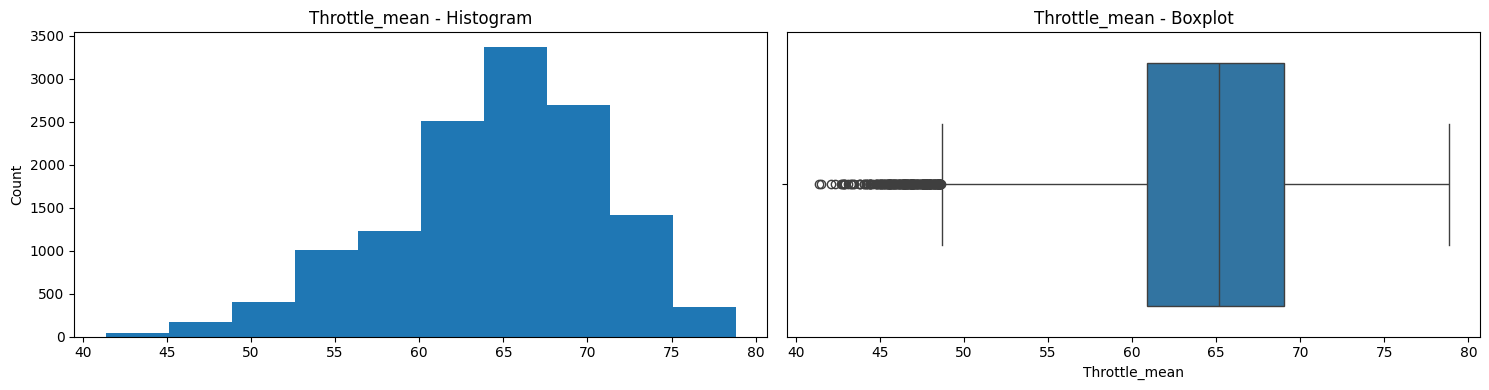


Column: Throttle_std
Skew: -0.64


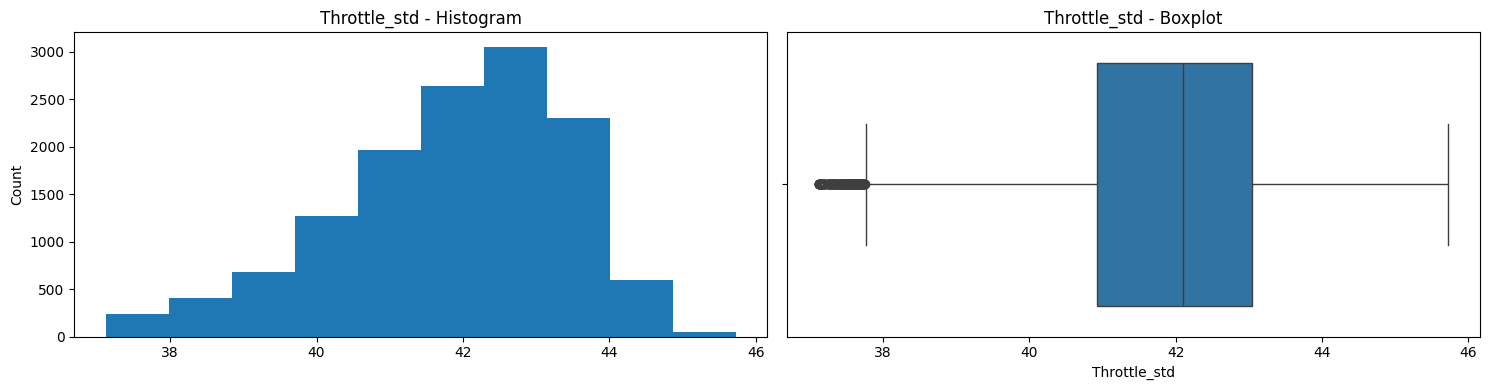


Column: WindSpeed
Skew: 0.67


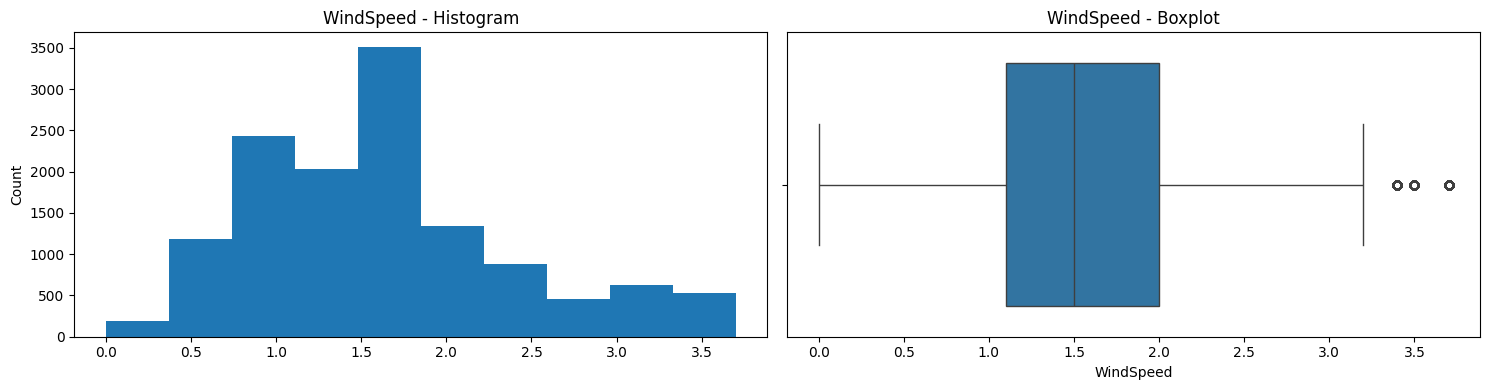


Column: nGear_median
Skew: -0.36


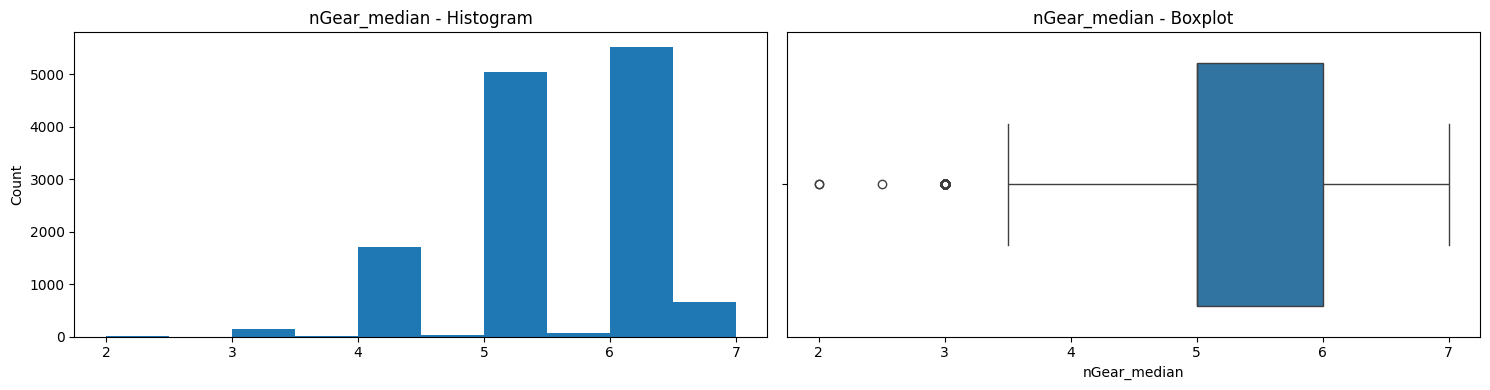


Column: Stint
Skew: 0.55


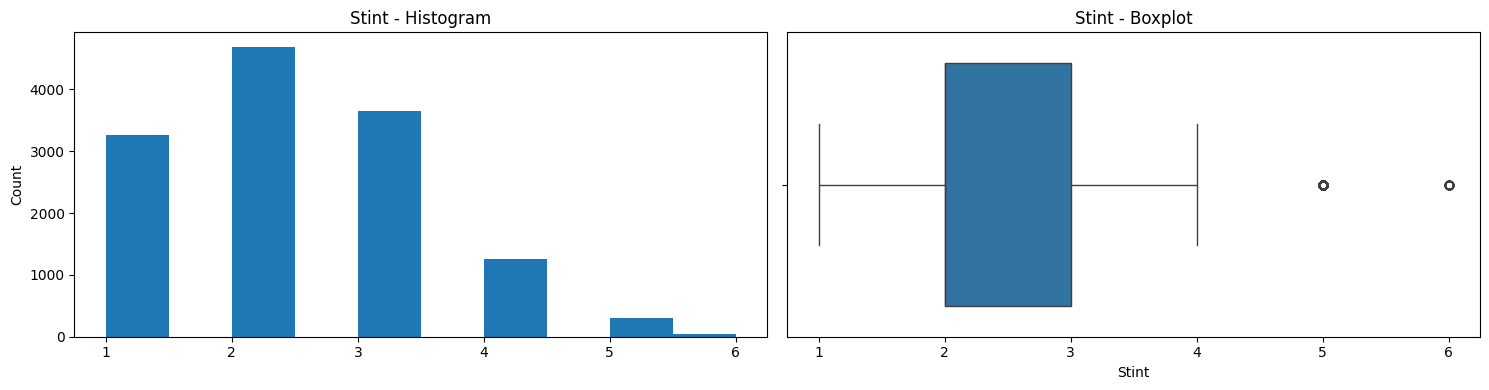


Column: nGear_min
Skew: 0.01


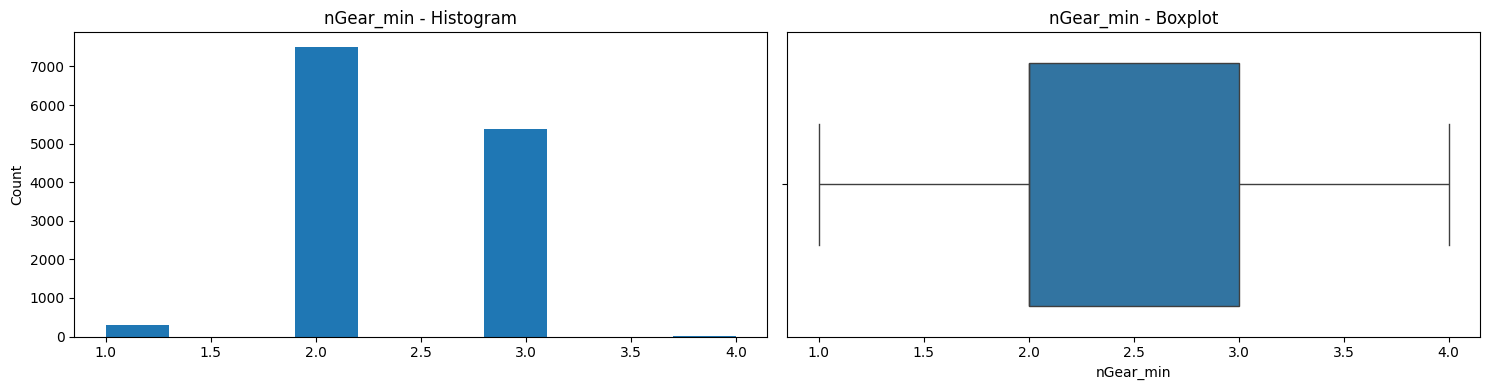

In [186]:
laps_df[skewed_columns] = laps_df[skewed_columns].apply(remove_outliers)
laps_df = laps_df.dropna()
univariate_analysis(laps_df, skewed_columns)


Column: AirTemp
Skew: -0.14


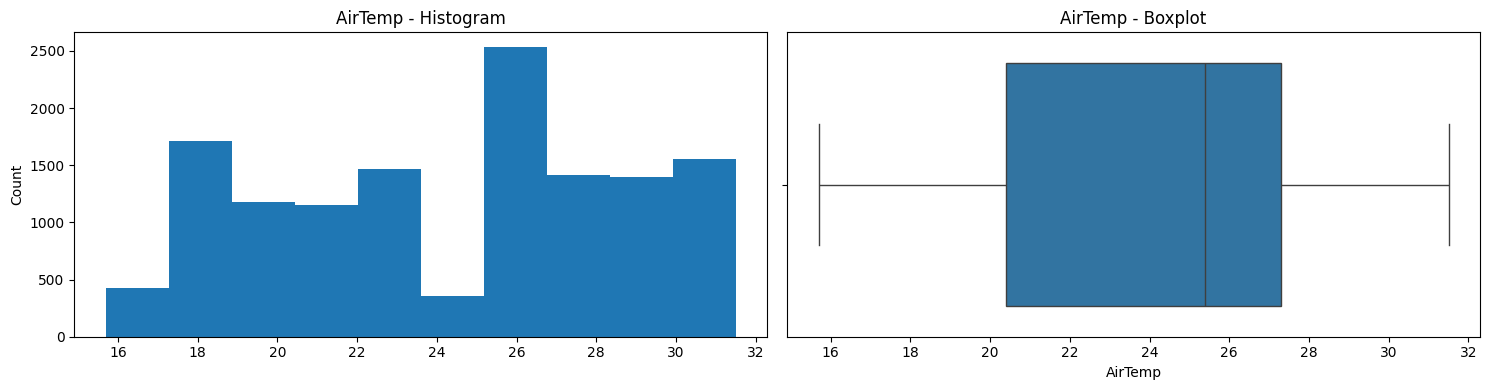


Column: TrackTemp
Skew: 0.08


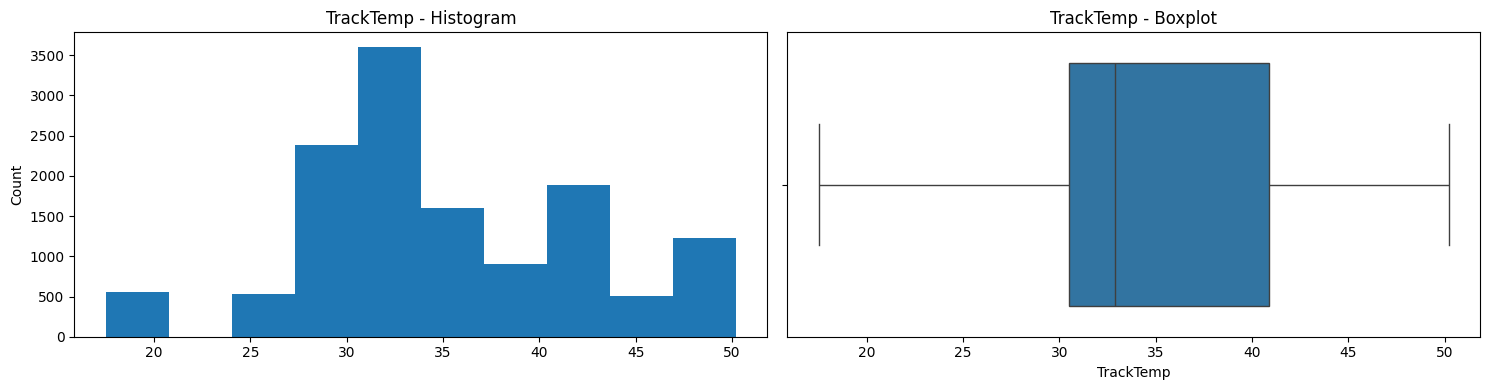

In [187]:
univariate_analysis(laps_df, strange_columns)

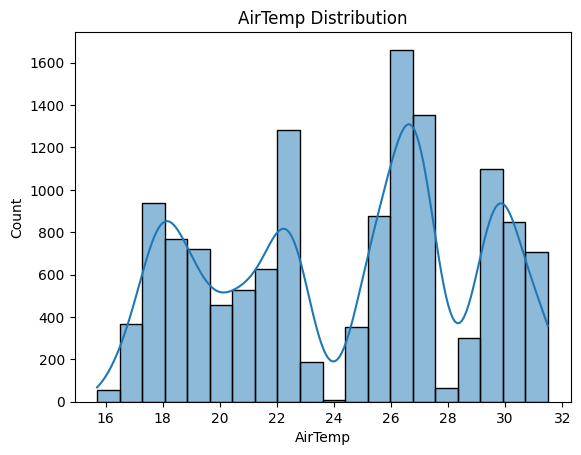

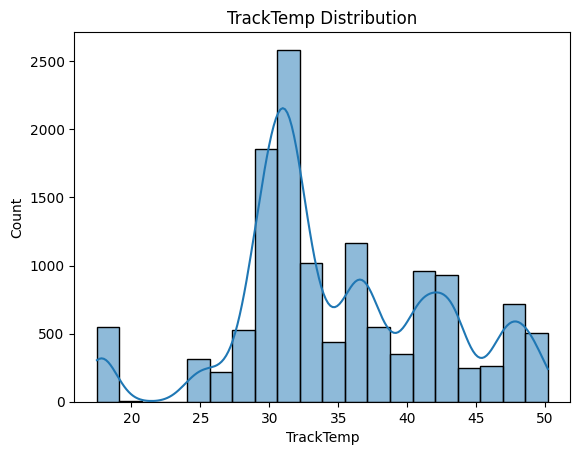

In [188]:
sns.histplot(laps_df['AirTemp'], kde=True, bins=20)
plt.title('AirTemp Distribution')
plt.show()

sns.histplot(laps_df['TrackTemp'], kde=True, bins=20)
plt.title('TrackTemp Distribution')
plt.show()

In [189]:
from scipy.stats import shapiro, kstest

tat, p_value_air = shapiro(laps_df['AirTemp'].dropna())
stat, p_value_track = shapiro(laps_df['TrackTemp'].dropna())

print('AirTemp normality p-value:', p_value_air)
print('TrackTemp normality p-value:', p_value_track)

AirTemp normality p-value: 2.5961818161251492e-58
TrackTemp normality p-value: 8.746944394405182e-53


/var/folders/nt/3678lqn921q87jrzbvvjyw9r0000gn/T/ipykernel_62739/1791926368.py:3: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13192.
  tat, p_value_air = shapiro(laps_df['AirTemp'].dropna())
/var/folders/nt/3678lqn921q87jrzbvvjyw9r0000gn/T/ipykernel_62739/1791926368.py:4: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13192.
  stat, p_value_track = shapiro(laps_df['TrackTemp'].dropna())


In [190]:
airtemp_bins = [float('-inf'), 20, 24, 28, float('inf')]
airtemp_labels = ['Cold', 'Normal', 'Hot', 'Very Hot']
laps_df['AirTemp_Category'] = pd.cut(laps_df['AirTemp'], bins=airtemp_bins, labels=airtemp_labels)
laps_df = laps_df.drop(columns = ['AirTemp'])

In [191]:
tracktemp_bins = [float('-inf'), 20, 35, 45, float('inf')]
tracktemp_labels = ['Cold', 'Normal', 'Hot', 'Very Hot']
laps_df['TrackTemp_Category'] = pd.cut(laps_df['TrackTemp'], bins=tracktemp_bins, labels=tracktemp_labels)
laps_df = laps_df.drop(columns = ['TrackTemp'])

In [192]:
laps_df[laps_df.select_dtypes(include=['object']).columns] = laps_df[laps_df.select_dtypes(include=['object']).columns].astype('category')
laps_df.dtypes

Driver                     category
LapTime                     float64
LapNumber                   float64
Stint                       float64
SpeedAtFinishLine           float64
SpeedAtLongestStraight      float64
IsPersonalBest                 bool
Compound                   category
LapsOnTyre                  float64
FreshTyre                      bool
Team                       category
Position                    float64
Humidity                    float64
Rainfall                       bool
WindSpeed                   float64
Speed_mean                  float64
Speed_median                float64
Speed_min                   float64
Speed_max                   float64
Speed_std                   float64
RPM_mean                    float64
RPM_median                  float64
RPM_min                     float64
RPM_max                     float64
RPM_std                     float64
Throttle_mean               float64
Throttle_std                float64
nGear_median                

In [210]:
categorical_columns = laps_df.select_dtypes(include=['category', 'bool']).columns
numerical_columns = laps_df.columns.difference(categorical_columns)
print(f'numerical columns:\n{numerical_columns}')
print(f'categorical columns:\n{categorical_columns}')

numerical columns:
Index(['Humidity', 'LapTime', 'RPM_max', 'RPM_std', 'SpeedAtFinishLine',
       'Speed_min', 'combo_speed_max_speed_std', 'combo_stint_lap_number'],
      dtype='object')
categorical columns:
Index(['Driver', 'IsPersonalBest', 'FreshTyre', 'Team', 'Rainfall',
       'ContainsTrackStatus1', 'ContainsTrackStatus2', 'ContainsTrackStatus4',
       'ContainsTrackStatus6', 'ContainsTrackStatus7',
       'SpeedAfterSector1IsFast', 'SpeedAfterSector2IsFast', 'Compound_HARD',
       'Compound_INTERMEDIATE', 'Compound_MEDIUM', 'Compound_SOFT',
       'DirectionOfWind_East', 'DirectionOfWind_North',
       'DirectionOfWind_South', 'DirectionOfWind_West',
       'Pressure_Category_Very Low', 'Pressure_Category_Low',
       'Pressure_Category_Normal', 'AirTemp_Category_Cold',
       'AirTemp_Category_Normal', 'AirTemp_Category_Hot',
       'AirTemp_Category_Very Hot', 'TrackTemp_Category_Cold',
       'TrackTemp_Category_Normal', 'TrackTemp_Category_Hot',
       'TrackTemp_Catego

In [194]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
laps_df[numerical_columns] = scaler.fit_transform(laps_df[numerical_columns])

In [195]:
normalised_max_min = {}
for i, column in enumerate(numerical_columns):
    normalised_max_min[column] = {'max': scaler.data_max_[i],
                         'min': scaler.data_min_[i]}

In [196]:
import json
with open('../models/normalised_max_min.json', 'w') as fp:
    json.dump(normalised_max_min, fp)

In [197]:
# Calculate Pearson correlation coefficients
correlation_matrix = laps_df[numerical_columns].corr()

# Print the correlation of all features with lapTime
print(correlation_matrix['LapTime'])


Brake_mean                0.000094
Humidity                 -0.120587
LapNumber                -0.270626
LapTime                   1.000000
LapsOnTyre               -0.098894
Position                  0.023744
RPM_max                   0.164813
RPM_mean                 -0.091066
RPM_median                0.036987
RPM_min                  -0.152395
RPM_std                   0.256131
SpeedAtFinishLine        -0.234323
SpeedAtLongestStraight    0.091083
Speed_max                 0.228368
Speed_mean               -0.007446
Speed_median             -0.027810
Speed_min                -0.153553
Speed_std                 0.363182
Stint                    -0.397628
Throttle_mean            -0.045505
Throttle_std              0.016777
WindSpeed                 0.012530
nGear_median             -0.043628
nGear_min                -0.125817
Name: LapTime, dtype: float64


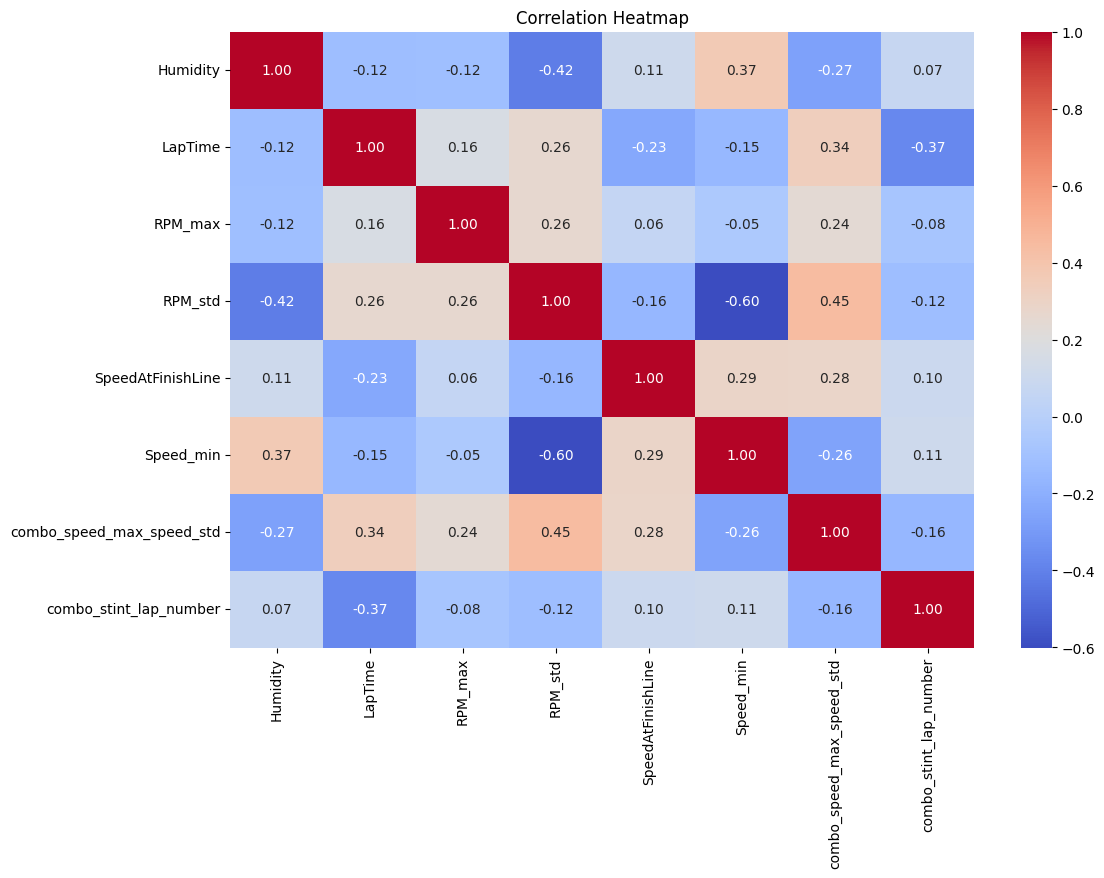

In [211]:
correlation_matrix = laps_df[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



In [212]:
condition_number = np.linalg.cond(laps_df[numerical_columns].drop(columns=['LapTime']))
print(f'Condition Number: {condition_number}')


Condition Number: 10.557011569332177


In [200]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming laps_df is your DataFrame
X = laps_df[numerical_columns].drop(columns=['LapTime'])
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


print(vif_data)

                   Feature         VIF
0               Brake_mean   25.669136
1                 Humidity    9.394528
2                LapNumber   15.128829
3               LapsOnTyre    6.323235
4                 Position    4.245471
5                  RPM_max   15.126167
6                 RPM_mean  215.421965
7               RPM_median  108.040190
8                  RPM_min  103.811917
9                  RPM_std   58.871436
10       SpeedAtFinishLine   14.939014
11  SpeedAtLongestStraight   36.227511
12               Speed_max   78.962335
13              Speed_mean  639.259615
14            Speed_median  507.969371
15               Speed_min  164.149240
16               Speed_std   57.769861
17                   Stint    9.366235
18           Throttle_mean  128.922433
19            Throttle_std   23.045560
20               WindSpeed    7.923551
21            nGear_median   88.051204
22               nGear_min   43.724397


In [201]:
columns_to_drop = ['RPM_median', 'Speed_median', 'Speed_mean', 'Throttle_mean', 'nGear_min', 'RPM_min', 'SpeedAtLongestStraight', 'Position', 'WindSpeed', 'RPM_mean', 'Brake_mean', 'LapsOnTyre', 'Throttle_std', 'nGear_median']
laps_df = laps_df.drop(columns=columns_to_drop)

In [202]:
laps_df['combo_speed_max_speed_std'] = laps_df['Speed_max'] * laps_df['Speed_std']
laps_df = laps_df.drop(columns=['Speed_max', 'Speed_std'])
laps_df['combo_stint_lap_number'] = laps_df['Stint'] * laps_df['LapNumber']
laps_df = laps_df.drop(columns=['Stint', 'LapNumber'])

In [203]:
for column in categorical_columns:
    print(column, laps_df[column].nunique())

Driver 22
IsPersonalBest 2
Compound 4
FreshTyre 2
Team 10
Rainfall 2
ContainsTrackStatus1 2
ContainsTrackStatus2 2
ContainsTrackStatus3 1
ContainsTrackStatus4 2
ContainsTrackStatus5 1
ContainsTrackStatus6 2
ContainsTrackStatus7 2
DirectionOfWind 4
Pressure_Category 3
SpeedAfterSector1IsFast 2
SpeedAfterSector2IsFast 2
AirTemp_Category 4
TrackTemp_Category 4


In [204]:
laps_df.groupby('Team')['LapTime'].mean()

/var/folders/nt/3678lqn921q87jrzbvvjyw9r0000gn/T/ipykernel_62739/3571507913.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  laps_df.groupby('Team')['LapTime'].mean()


Team
Alfa Romeo         0.391312
AlphaTauri         0.374499
Alpine             0.377445
Aston Martin       0.365008
Ferrari            0.378592
Haas F1 Team       0.400036
McLaren            0.346154
Mercedes           0.368116
Red Bull Racing    0.369609
Williams           0.390042
Name: LapTime, dtype: float64

In [205]:
embeddings_features = ['Driver', 'Team']
one_hot_encode_features = ['Compound', 'DirectionOfWind', 'Pressure_Category', 'AirTemp_Category', 'TrackTemp_Category']
only_one_category_features = ['ContainsTrackStatus3', 'ContainsTrackStatus5']
boolean_features = ['IsPersonalBest', 'FreshTyre', 'Rainfall', 'ContainsTrackStatus1', 'ContainsTrackStatus2', 'ContainsTrackStatus4', 'ContainsTrackStatus6', 'ContainsTrackStatus7', 'SpeedAfterSector1IsFast', 'SpeedAfterSector2IsFast']

In [206]:
laps_df[categorical_columns].dtypes

Driver                     category
IsPersonalBest                 bool
Compound                   category
FreshTyre                      bool
Team                       category
Rainfall                       bool
ContainsTrackStatus1           bool
ContainsTrackStatus2           bool
ContainsTrackStatus3           bool
ContainsTrackStatus4           bool
ContainsTrackStatus5           bool
ContainsTrackStatus6           bool
ContainsTrackStatus7           bool
DirectionOfWind            category
Pressure_Category          category
SpeedAfterSector1IsFast        bool
SpeedAfterSector2IsFast        bool
AirTemp_Category           category
TrackTemp_Category         category
dtype: object

In [207]:
laps_df = pd.get_dummies(laps_df, columns=one_hot_encode_features, drop_first=False)
    
laps_df = laps_df.drop(columns=only_one_category_features)


In [208]:
laps_df.dtypes

Driver                         category
LapTime                         float64
SpeedAtFinishLine               float64
IsPersonalBest                     bool
FreshTyre                          bool
Team                           category
Humidity                        float64
Rainfall                           bool
Speed_min                       float64
RPM_max                         float64
RPM_std                         float64
ContainsTrackStatus1               bool
ContainsTrackStatus2               bool
ContainsTrackStatus4               bool
ContainsTrackStatus6               bool
ContainsTrackStatus7               bool
SpeedAfterSector1IsFast            bool
SpeedAfterSector2IsFast            bool
combo_speed_max_speed_std       float64
combo_stint_lap_number          float64
Compound_HARD                      bool
Compound_INTERMEDIATE              bool
Compound_MEDIUM                    bool
Compound_SOFT                      bool
DirectionOfWind_East               bool


In [209]:
laps_df.to_csv('preprocessed_laps.csv', index=False)
laps_df.to_pickle('preprocessed_laps.pkl')